08-01-25: TO CHECK FOR THE VARIOUS WAYS TO GET THE COMBINATION OF FEATURES !!

Types of Feature Selection Methods
Feature selection methods can be broadly classified into three categories:

Filter Methods: Filter methods use statistical techniques to evaluate the relevance of features independently of the model. Common techniques include correlation coefficients, chi-square tests, and mutual information.

Wrapper Methods: Wrapper methods use a predictive model to evaluate feature subsets and select the best-performing combination. Techniques include recursive feature elimination (RFE) and forward/backward feature selection.

Embedded Methods: Embedded methods perform feature selection during the model training process. Examples include Lasso (L1 regularization) and feature importance from tree-based models.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression, Ridge, Lasso
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.svm import SVR
# from xgboost import XGBRegressor
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFE

In [3]:
data=pd.read_csv(r"C:\Users\neevb\OneDrive\Desktop\new_data_final_year\analysis\Data_ETo_PM.csv")
data['DATE'] = pd.to_datetime(data['DATE'], errors='coerce', dayfirst=True)
data.set_index('DATE',inplace=True)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16064 entries, 1981-01-01 to 2024-12-29
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T2M     16064 non-null  float64
 1   TMIN    16064 non-null  float64
 2   TMAX    16064 non-null  float64
 3   TDEW    16064 non-null  float64
 4   RH2M    16064 non-null  float64
 5   RAIN    16064 non-null  float64
 6   WIND    16064 non-null  float64
 7   SRAD    16064 non-null  float64
 8   TMEAN   16064 non-null  float64
 9   ET0_PM  16064 non-null  float64
dtypes: float64(10)
memory usage: 1.3 MB


Maams method:

Forward selection:

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Replace this with your dataset and labels
X = data.drop(['ET0_PM'], axis=1)  
y = data['ET0_PM']  

# Initialize an empty list to store selected feature names
selected_feature_names = []

# Define the machine learning model (in this case, a Random Forest Regressor)
model = RandomForestRegressor()

# Define the number of features you want to select
num_features_to_select = 5

while len(selected_feature_names) < num_features_to_select:
    best_score = -np.inf  # Use negative infinity since R² can be negative
    best_feature = None

    for feature in X.columns:
        if feature in selected_feature_names:
            continue

        # Try adding the feature to the selected set
        candidate_features = selected_feature_names + [feature]

        # Evaluate the model's performance using cross-validation
        scores = cross_val_score(model, X[candidate_features], y, cv=5, scoring='r2')  
        mean_score = np.mean(scores)

        # Keep track of the best-performing feature
        if mean_score > best_score:
            best_score = mean_score
            best_feature = feature

    if best_feature is not None:
        selected_feature_names.append(best_feature)
        print(f"Selected Feature {len(selected_feature_names)}: {best_feature}, Mean R²: {best_score:.4f}")

print("Selected feature names:", selected_feature_names)

Selected Feature 1: SRAD, Mean R²: 0.9368
Selected Feature 2: WIND, Mean R²: 0.9997
Selected Feature 3: RH2M, Mean R²: 0.9996
Selected Feature 4: T2M, Mean R²: 0.9996
Selected Feature 5: TMEAN, Mean R²: 0.9996
Selected feature names: ['SRAD', 'WIND', 'RH2M', 'T2M', 'TMEAN']


Backward Elimination:

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Replace this with your dataset and labels
X = data.drop(['ET0_PM'], axis=1)  
y = data['ET0_PM']  

# Define the machine learning model (Random Forest Regressor)
model = RandomForestRegressor()

# Initialize a list with all feature names
all_features = list(X.columns)

# Define the minimum number of features to retain
min_features_to_retain = 5

while len(all_features) > min_features_to_retain:
    worst_score = 1
    worst_feature = None

    for feature in all_features:
        # Create a list of features without the current one
        candidate_features = [f for f in all_features if f != feature]

        # Evaluate the model's performance using cross-validation
        scores = cross_val_score(model, X[candidate_features], y, cv=5, scoring='r2')  
        mean_score = np.mean(scores)

        # Keep track of the worst-performing feature
        if mean_score < worst_score:
            worst_score = mean_score
            worst_feature = feature

    if worst_feature is not None:
        all_features.remove(worst_feature)
        print(f"Removed Feature: {worst_feature}, Mean R²: {worst_score:.4f}")

print("Remaining feature names:", all_features)


Removed Feature: SRAD, Mean R²: 0.4572
Removed Feature: RAIN, Mean R²: 0.3690
Removed Feature: WIND, Mean R²: 0.2993
Removed Feature: RH2M, Mean R²: 0.2671
Remaining feature names: ['T2M', 'TMIN', 'TMAX', 'TDEW', 'TMEAN']


In [14]:
data.corr()

,T2M,TMIN,TMAX,TDEW,RH2M,RAIN,WIND,SRAD,TMEAN,ET0_PM
T2M,1.000000,0.607541,0.884137,-0.155644,-0.644105,-0.274643,-0.196339,0.509563,0.993833,0.488580
TMIN,0.607541,1.000000,0.181515,0.628373,0.176885,0.153662,0.167812,0.026274,0.590401,0.068857
TMAX,0.884137,0.181515,1.000000,-0.557660,-0.901002,-0.437946,-0.337159,0.624957,0.900869,0.575709
TDEW,-0.155644,0.628373,-0.557660,1.000000,0.844713,0.374073,0.324448,-0.383963,-0.180318,-0.325116
RH2M,-0.644105,0.176885,-0.901002,0.844713,1.000000,0.465304,0.375675,-0.574055,-0.661411,-0.512470
RAIN,-0.274643,0.153662,-0.437946,0.374073,0.465304,1.000000,0.405212,-0.575707,-0.291612,-0.508132
WIND,-0.196339,0.167812,-0.337159,0.324448,0.375675,0.405212,1.000000,-0.367985,-0.202645,-0.131900
SRAD,0.509563,0.026274,0.624957,-0.383963,-0.574055,-0.575707,-0.367985,1.000000,0.524528,0.970236
TMEAN,0.993833,0.590401,0.900869,-0.180318,-0.661411,-0.291612,-0.202645,0.524528,1.000000,0.502904
ET0_PM,0.488580,0.068857,0.575709,-0.325116,-0.512470,-0.508132,-0.131900,0.970236,0.502904,1.000000


Recursive Feature Elimination:

In [9]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Replace this with your dataset and labels
X = data.drop(['ET0_PM'], axis=1)  
y = data['ET0_PM']  

# Define the machine learning model (Random Forest Regressor)
model = RandomForestRegressor()

# Specify the number of features to retain
num_features_to_retain = 5

# Initialize the RFE selector with the model and the number of features to retain
rfe = RFE(model, n_features_to_select=num_features_to_retain)

# Fit the RFE selector to your data
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]

print("Selected feature names:", list(selected_features))

# Evaluate model performance with the selected features using cross-validation
scores = cross_val_score(model, X[selected_features], y, cv=5, scoring='r2')
mean_r2 = np.mean(scores)
print(f"Mean R² with Selected Features: {mean_r2:.4f}")

Selected feature names: ['TMAX', 'RH2M', 'RAIN', 'WIND', 'SRAD']
Mean R² with Selected Features: 0.9995


In [13]:
data.corr()

,T2M,TMIN,TMAX,TDEW,RH2M,RAIN,WIND,SRAD,TMEAN,ET0_PM
T2M,1.000000,0.607541,0.884137,-0.155644,-0.644105,-0.274643,-0.196339,0.509563,0.993833,0.488580
TMIN,0.607541,1.000000,0.181515,0.628373,0.176885,0.153662,0.167812,0.026274,0.590401,0.068857
TMAX,0.884137,0.181515,1.000000,-0.557660,-0.901002,-0.437946,-0.337159,0.624957,0.900869,0.575709
TDEW,-0.155644,0.628373,-0.557660,1.000000,0.844713,0.374073,0.324448,-0.383963,-0.180318,-0.325116
RH2M,-0.644105,0.176885,-0.901002,0.844713,1.000000,0.465304,0.375675,-0.574055,-0.661411,-0.512470
RAIN,-0.274643,0.153662,-0.437946,0.374073,0.465304,1.000000,0.405212,-0.575707,-0.291612,-0.508132
WIND,-0.196339,0.167812,-0.337159,0.324448,0.375675,0.405212,1.000000,-0.367985,-0.202645,-0.131900
SRAD,0.509563,0.026274,0.624957,-0.383963,-0.574055,-0.575707,-0.367985,1.000000,0.524528,0.970236
TMEAN,0.993833,0.590401,0.900869,-0.180318,-0.661411,-0.291612,-0.202645,0.524528,1.000000,0.502904
ET0_PM,0.488580,0.068857,0.575709,-0.325116,-0.512470,-0.508132,-0.131900,0.970236,0.502904,1.000000


Exhaustive Search:

In [10]:
from itertools import combinations
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Replace this with your dataset and labels
X = data.drop(['ET0_PM'], axis=1)  
y = data['ET0_PM']  

# Define the machine learning model (Random Forest Regressor)
model = RandomForestRegressor()

# Define the maximum number of features to be selected
max_features = 5

# Initialize variables to keep track of the best feature subset and its R² score
best_subset = None
best_r2 = -np.inf  # Initialize with a very low value

# Generate all possible combinations of feature names
all_feature_combinations = list(combinations(X.columns, max_features))

for feature_subset in all_feature_combinations:
    # Evaluate the model's performance using cross-validation
    scores = cross_val_score(model, X[list(feature_subset)], y, cv=5, scoring='r2')
    mean_r2 = np.mean(scores)

    # Check if this feature subset is better than the best one found so far
    if mean_r2 > best_r2:
        best_r2 = mean_r2
        best_subset = feature_subset

print("Best Feature Subset:", best_subset)
print(f"Best R² Score: {best_r2:.4f}")


Best Feature Subset: ('T2M', 'TMAX', 'WIND', 'SRAD', 'TMEAN')
Best R² Score: 0.9996


In [12]:
data.corr()

,T2M,TMIN,TMAX,TDEW,RH2M,RAIN,WIND,SRAD,TMEAN,ET0_PM
T2M,1.000000,0.607541,0.884137,-0.155644,-0.644105,-0.274643,-0.196339,0.509563,0.993833,0.488580
TMIN,0.607541,1.000000,0.181515,0.628373,0.176885,0.153662,0.167812,0.026274,0.590401,0.068857
TMAX,0.884137,0.181515,1.000000,-0.557660,-0.901002,-0.437946,-0.337159,0.624957,0.900869,0.575709
TDEW,-0.155644,0.628373,-0.557660,1.000000,0.844713,0.374073,0.324448,-0.383963,-0.180318,-0.325116
RH2M,-0.644105,0.176885,-0.901002,0.844713,1.000000,0.465304,0.375675,-0.574055,-0.661411,-0.512470
RAIN,-0.274643,0.153662,-0.437946,0.374073,0.465304,1.000000,0.405212,-0.575707,-0.291612,-0.508132
WIND,-0.196339,0.167812,-0.337159,0.324448,0.375675,0.405212,1.000000,-0.367985,-0.202645,-0.131900
SRAD,0.509563,0.026274,0.624957,-0.383963,-0.574055,-0.575707,-0.367985,1.000000,0.524528,0.970236
TMEAN,0.993833,0.590401,0.900869,-0.180318,-0.661411,-0.291612,-0.202645,0.524528,1.000000,0.502904
ET0_PM,0.488580,0.068857,0.575709,-0.325116,-0.512470,-0.508132,-0.131900,0.970236,0.502904,1.000000


In [5]:
data.shape

(16064, 10)

In [3]:
data.columns

Index(['T2M', 'TMIN', 'TMAX', 'TDEW', 'RH2M', 'RAIN', 'WIND', 'SRAD', 'TMEAN',
       'ET0_PM'],
      dtype='object')

In [4]:

data.head()

,T2M,TMIN,TMAX,TDEW,RH2M,RAIN,WIND,SRAD,TMEAN,ET0_PM
DATE,,,,,,,,,,
1981-01-01,26.1,21.4,31.3,20.1,71.2,0.1,2.1,17.829181,26.35,6.583253
1981-01-02,26.3,22.2,31.4,20.3,71.3,0.1,1.9,18.717950,26.80,6.827785
1981-01-03,26.4,22.0,31.3,20.8,72.9,0.1,1.5,18.337341,26.65,6.440432
1981-01-04,26.1,21.8,31.4,20.5,73.1,2.7,1.7,18.777516,26.60,6.736497
1981-01-05,25.6,21.2,31.1,19.4,71.8,2.4,1.4,19.308447,26.15,6.779849


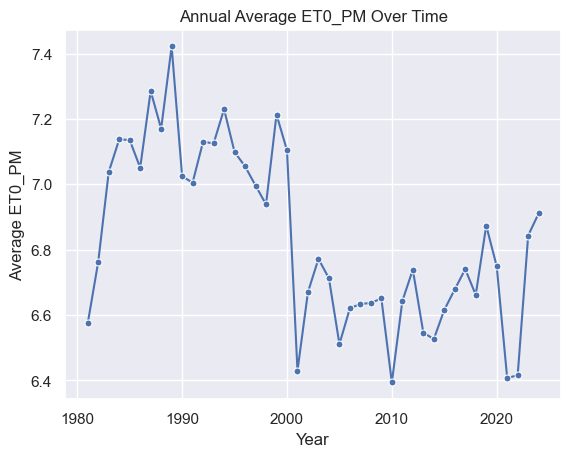

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the seaborn theme
sns.set_theme(style="darkgrid")

# Assuming your DataFrame is named 'df' and the index is time-based

# Create a new column 'year' for better visualization
data['year'] = data.index.year 

# Downsample the data to reduce congestion
downsampled_df = data.groupby('year').mean() 

# Plotting the downsampled ET0_PM values over time
sns.lineplot(x=downsampled_df.index, y=downsampled_df["ET0_PM"], marker="o", markersize=5)

# Setting the title and labels
plt.title("Annual Average ET0_PM Over Time")
plt.xlabel("Year")
plt.ylabel("Average ET0_PM")

# Displaying the plot
plt.show()

In [5]:
data.drop('year',axis=1,inplace=True)

In [11]:
# from statsmodels.tsa.stattools import adfuller

# def check_stationarity(timeseries):
#     """
#     Performs the Augmented Dickey-Fuller (ADF) test to check for stationarity.

#     Args:
#         timeseries: The time series data as a pandas Series or a flattened 1D array.

#     Returns:
#         A tuple containing:
#             - ADF Statistic: The test statistic.
#             - p-value: The p-value of the test.
#             - Lags Used: Number of lags used in the test.
#             - Number of Observations Used: Number of observations used for the ADF regression and calculation of the critical values.
#             - Critical Values: Dictionary of critical values for different confidence levels.
#     """

#     if isinstance(timeseries, pd.Series):
#         # Handle pandas Series data
#         timeseries = timeseries.values

#     # Ensure the data is a flattened 1D array
#     timeseries = timeseries.flatten()

#     result = adfuller(timeseries)
#     print('ADF Statistic: %f' % result[0])
#     print('p-value: %f' % result[1])
#     print('Critical Values:')
#     for key, value in result[4].items():
#         print('\t%s: %.3f' % (key, value))

#     if result[1] <= 0.05:
#         print("Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is likely stationary")
#     else:
#         print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")

# # Example Usage:
# # Assuming your time series data is in a pandas Series named 'data'
# check_stationarity(data.ET0_PM)

In [12]:
data.columns

Index(['T2M', 'TMIN', 'TMAX', 'TDEW', 'RH2M', 'RAIN', 'WIND', 'SRAD', 'TMEAN',
       'ET0_PM'],
      dtype='object')

In [6]:
data

,T2M,TMIN,TMAX,TDEW,RH2M,RAIN,WIND,SRAD,TMEAN,ET0_PM
DATE,,,,,,,,,,
1981-01-01,26.10,21.40,31.30,20.10,71.20,0.10,2.10,17.829181,26.350,6.583253
1981-01-02,26.30,22.20,31.40,20.30,71.30,0.10,1.90,18.717950,26.800,6.827785
1981-01-03,26.40,22.00,31.30,20.80,72.90,0.10,1.50,18.337341,26.650,6.440432
1981-01-04,26.10,21.80,31.40,20.50,73.10,2.70,1.70,18.777516,26.600,6.736497
1981-01-05,25.60,21.20,31.10,19.40,71.80,2.40,1.40,19.308447,26.150,6.779849
...,...,...,...,...,...,...,...,...,...,...
2024-12-25,25.22,21.49,29.10,20.98,77.89,0.48,1.44,16.130000,25.295,5.508748
2024-12-26,26.12,22.65,28.94,21.72,77.01,0.95,0.84,11.300000,25.795,3.186775
2024-12-27,26.21,23.18,29.96,22.41,80.17,3.04,1.20,16.630000,26.570,5.569560


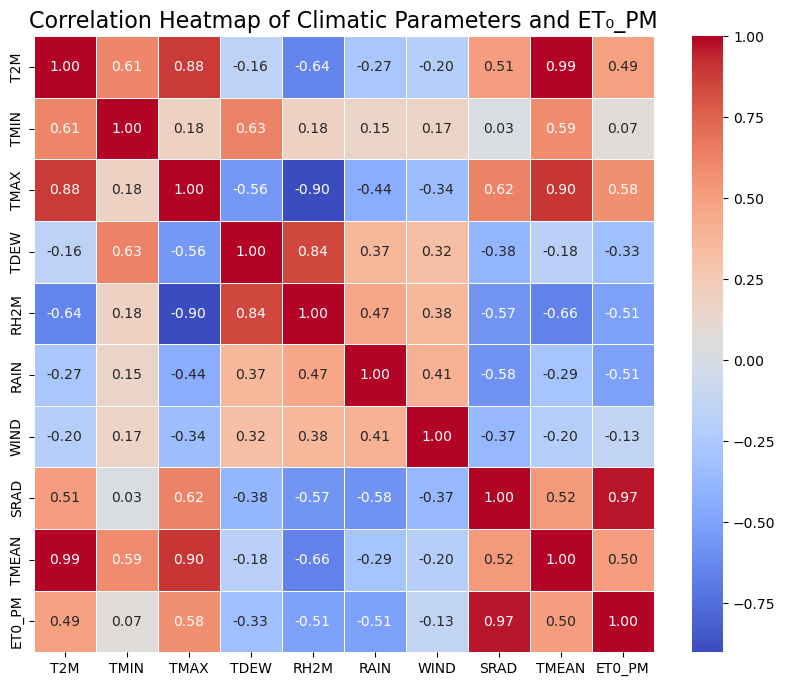

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix of the dataset
corr_matrix = data.corr()

# Create the heatmap plot
plt.figure(figsize=(10, 8))  # Adjust the figure size for better visibility
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set title for the plot
plt.title('Correlation Heatmap of Climatic Parameters and ET₀_PM', fontsize=16)

# Save the plot as an image file (e.g., PNG or SVG)
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [5]:
X=data.drop(['ET0_PM'],axis=1) 
y=data['ET0_PM'] 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

Filter method:

1.1 Pearson/Spearman Correlation + VIF

In [6]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

def filter_methods(X, y, corr_threshold=0.3, vif_threshold=5):
    # Calculate Pearson correlation with target
    corr = X.corrwith(y)
    selected_features = corr[abs(corr) > corr_threshold].index.tolist()
    X_filtered = X[selected_features]

    # Remove multicollinear features using VIF
    vif = pd.DataFrame()
    vif["feature"] = X_filtered.columns
    vif["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]
    non_collinear_features = vif[vif["VIF"] < vif_threshold]["feature"].tolist()

    return non_collinear_features

# Example usage:
selected_features = filter_methods(X, y)
selected_features

['RAIN']

In [7]:
from sklearn.feature_selection import SelectPercentile, mutual_info_regression

def mutual_info_selection(X, y, percentile=50):
    # Automatically select top X% of features
    selector = SelectPercentile(score_func=mutual_info_regression, percentile=percentile)
    selector.fit(X, y)
    return X.columns[selector.get_support()].tolist()

# Example usage:
selected_features = mutual_info_selection(X, y)
selected_features

['TMAX', 'RAIN', 'WIND', 'SRAD']

2. Wrapper Methods

2.1 Recursive Feature Elimination with Cross-Validation (RFECV)

In [17]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

def rfe_cv(X, y):
    estimator = LinearRegression()
    selector = RFECV(estimator, step=2, cv=10, scoring='r2')
    selector.fit(X, y)
    return X.columns[selector.support_].tolist()

# Example usage:
selected_features = rfe_cv(X, y)
selected_features

['T2M', 'TMIN', 'TMAX', 'TDEW', 'RH2M', 'RAIN', 'WIND', 'SRAD', 'TMEAN']

In [18]:
# 2.2 Forward Selection with Automated Stopping
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

def forward_selection(X, y):
    sfs = SequentialFeatureSelector(
        LinearRegression(),
        k_features='best',  # Auto-selects best subset
        forward=True,
        scoring='r2',
        cv=5
    )
    sfs.fit(X, y)
    return list(sfs.k_feature_names_)

# Example usage:
selected_features = forward_selection(X_train, y_train)
selected_features

c:\Users\neevb\anaconda3\envs\evdp\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\neevb\anaconda3\envs\evdp\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\neevb\anaconda3\envs\evdp\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\neevb\anaconda3\envs\evdp\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\neevb\anaconda3\envs\evdp\lib\site-packages\sklearn\model_selection\_valida

['T2M', 'TDEW', 'RH2M', 'RAIN', 'WIND', 'SRAD', 'TMEAN']

3. Embedded Methods

 LASSO (L1 Regularization)

In [19]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

def lasso_selection(X, y):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    lasso = LassoCV(cv=5).fit(X_scaled, y)
    selected_features = X.columns[np.abs(lasso.coef_) > 0].tolist()
    return selected_features

# Example usage:
selected_features = lasso_selection(X_train, y_train)
selected_features

['T2M', 'WIND', 'SRAD', 'TMEAN']

3.2 Tree-Based Feature Importance

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

def tree_importance(X, y):
    rf = RandomForestRegressor(n_estimators=100)
    rf.fit(X, y)
    selector = SelectFromModel(rf, prefit=True, threshold='median')  # Auto-threshold
    return X.columns[selector.get_support()].tolist()

# Example usage:
selected_features = tree_importance(X_train, y_train)
selected_features

['TDEW', 'RH2M', 'RAIN', 'WIND', 'SRAD']

4. Hybrid Approach (Filter + Wrapper)

In [23]:
def hybrid_selection(X, y):
    # Step 1: Filter using correlation and VIF
    filtered_features = filter_methods(X, y, corr_threshold=0.3, vif_threshold=5)
    X_filtered = X[filtered_features]
    
    # Step 2: Wrapper (Forward Selection)
    sfs = SequentialFeatureSelector(
        RandomForestRegressor(),
        k_features='best',
        forward=True,
        scoring='r2',
        cv=5
    )
    sfs.fit(X_filtered, y)
    return list(sfs.k_feature_names_)

# Example usage:
selected_features = hybrid_selection(X_train, y_train)
selected_features

c:\Users\neevb\anaconda3\envs\evdp\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(


['RAIN']

5. Genetic Algorithm (Wrapper)

In [24]:
def hybrid_selection(X, y):
    # Step 1: Filter using correlation and VIF
    filtered_features = filter_methods(X, y, corr_threshold=0.3, vif_threshold=5)
    X_filtered = X[filtered_features]
    
    # Step 2: Wrapper (Forward Selection)
    sfs = SequentialFeatureSelector(
        LinearRegression(),
        k_features='best',
        forward=True,
        scoring='r2',
        cv=5
    )
    sfs.fit(X_filtered, y)
    return list(sfs.k_feature_names_)

# Example usage:
selected_features = hybrid_selection(X_train, y_train)
selected_features

c:\Users\neevb\anaconda3\envs\evdp\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(


['RAIN']

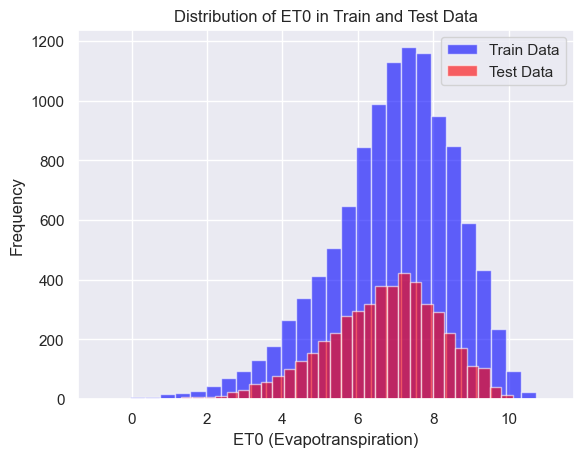

In [15]:
import matplotlib.pyplot as plt

# Assuming 'train_data' and 'test_data' have 'ET0' column for evapotranspiration
# and you want to plot the distribution of ET0 in both train and test datasets

# Plotting the distribution of ET0 for the training data
plt.hist(y_train, bins=30, alpha=0.6, color='blue', label='Train Data')

# Plotting the distribution of ET0 for the testing data
plt.hist(y_test, bins=30, alpha=0.6, color='red', label='Test Data')

# Adding labels and title
plt.xlabel('ET0 (Evapotranspiration)')
plt.ylabel('Frequency')
plt.title('Distribution of ET0 in Train and Test Data')

# Displaying the legend
plt.legend()

# Saving the plot as an image (optional)
plt.savefig('train_test_et0_plot.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


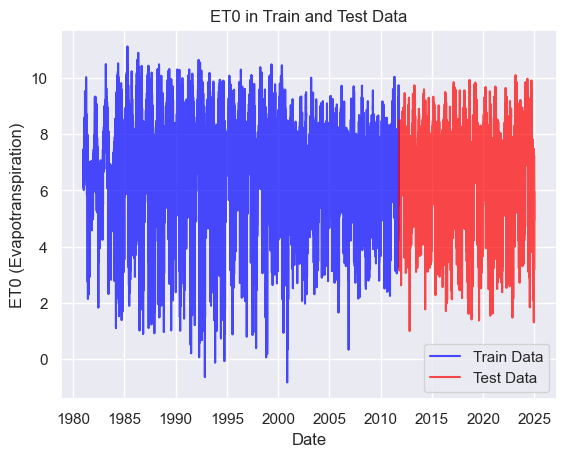

In [16]:
import matplotlib.pyplot as plt

# Assuming 'train_data' and 'test_data' have 'ET0' column for evapotranspiration

# Plotting the ET0 values for the train dataset
plt.plot(y_train.index, y_train, color='blue', alpha=0.7, label='Train Data')

# Plotting the ET0 values for the test dataset
plt.plot(y_test.index, y_test, color='red', alpha=0.7, label='Test Data')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('ET0 (Evapotranspiration)')
plt.title('ET0 in Train and Test Data')

# Displaying the legend
plt.legend()

# Saving the plot as an image (optional)
plt.savefig('train_test_et0_line_plot.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

In [17]:
X_train.head()

,T2M,TMIN,TMAX,TDEW,RH2M,RAIN,WIND,SRAD,TMEAN
DATE,,,,,,,,,
1981-01-01,26.1,21.4,31.3,20.1,71.2,0.1,2.1,17.829181,26.35
1981-01-02,26.3,22.2,31.4,20.3,71.3,0.1,1.9,18.717950,26.80
1981-01-03,26.4,22.0,31.3,20.8,72.9,0.1,1.5,18.337341,26.65
1981-01-04,26.1,21.8,31.4,20.5,73.1,2.7,1.7,18.777516,26.60
1981-01-05,25.6,21.2,31.1,19.4,71.8,2.4,1.4,19.308447,26.15


In [18]:
X_train.tail()

,T2M,TMIN,TMAX,TDEW,RH2M,RAIN,WIND,SRAD,TMEAN
DATE,,,,,,,,,
2011-10-10,25.6,24.0,27.7,23.3,87.3,4.6,1.8,17.0,25.85
2011-10-11,25.8,23.9,28.4,23.4,86.9,4.9,1.6,16.2,26.15
2011-10-12,25.4,24.0,27.9,23.2,87.8,9.2,1.6,16.7,25.95
2011-10-13,26.0,23.7,29.2,23.3,85.2,8.5,1.4,16.9,26.45
2011-10-14,26.9,24.4,30.2,24.0,85.1,13.2,1.2,16.4,27.30


In [19]:
X_test.head()

,T2M,TMIN,TMAX,TDEW,RH2M,RAIN,WIND,SRAD,TMEAN
DATE,,,,,,,,,
2011-10-15,26.5,24.8,29.1,24.2,87.3,9.4,1.0,17.6,26.95
2011-10-16,26.5,24.5,28.9,23.4,83.4,10.1,1.1,15.8,26.70
2011-10-17,26.4,24.1,29.6,23.5,84.6,6.2,1.3,15.4,26.85
2011-10-18,26.4,24.1,30.3,23.1,82.6,4.8,1.3,17.8,27.20
2011-10-19,25.3,23.0,28.5,22.9,86.6,11.7,1.4,20.4,25.75


In [20]:
X_test.tail()

,T2M,TMIN,TMAX,TDEW,RH2M,RAIN,WIND,SRAD,TMEAN
DATE,,,,,,,,,
2024-12-25,25.22,21.49,29.10,20.98,77.89,0.48,1.44,16.13,25.295
2024-12-26,26.12,22.65,28.94,21.72,77.01,0.95,0.84,11.30,25.795
2024-12-27,26.21,23.18,29.96,22.41,80.17,3.04,1.20,16.63,26.570
2024-12-28,25.57,22.72,28.95,20.72,75.26,0.29,2.21,18.86,25.835
2024-12-29,25.69,21.90,29.30,20.42,73.04,0.03,1.74,19.91,25.600


In [12]:
y_train

DATE
1981-01-01    6.583253
1981-01-02    6.827785
1981-01-03    6.440432
1981-01-04    6.736497
1981-01-05    6.779849
                ...   
2011-10-10    6.072062
2011-10-11    5.628106
2011-10-12    5.832730
2011-10-13    5.796386
2011-10-14    5.474023
Name: ET0_PM, Length: 11244, dtype: float64

In [13]:
X_train.columns

Index(['T2M', 'TMIN', 'TMAX', 'TDEW', 'RH2M', 'RAIN', 'WIND', 'SRAD', 'TMEAN'], dtype='object')

Filter Methods

In [14]:
from sklearn.feature_selection import f_regression

# Use f_regression for regression tasks
select_k_best = SelectKBest(score_func=f_regression, k=5)
X_train_k_best = select_k_best.fit_transform(X_train, y_train)

print("Selected features:", X_train.columns[select_k_best.get_support()])
#'TMAX', 'RH2M', 'RAIN', 'SRAD', 'TMEAN'

Selected features: Index(['TMAX', 'RH2M', 'RAIN', 'SRAD', 'TMEAN'], dtype='object')


In [ ]:
from sklearn.feature_selection import f_regression

# Use f_regression for regression tasks
select_k_best = SelectKBest(score_func=f_regression, k=5)
X_train_k_best = select_k_best.fit_transform(X, y)

print("Selected features:", X.columns[select_k_best.get_support()])
#'TMAX', 'RH2M', 'RAIN', 'SRAD', 'TMEAN'

Selected features: Index(['TMAX', 'RH2M', 'RAIN', 'SRAD', 'TMEAN'], dtype='object')


In [15]:
corr_matrix = data.corr()
print(corr_matrix['ET0_PM'].sort_values(ascending=False))


ET0_PM    1.000000
SRAD      0.970236
TMAX      0.575709
TMEAN     0.502904
T2M       0.488580
TMIN      0.068857
WIND     -0.131900
TDEW     -0.325116
RAIN     -0.508132
RH2M     -0.512470
Name: ET0_PM, dtype: float64


In [16]:
from sklearn.feature_selection import mutual_info_regression

mi = mutual_info_regression(X_train, y_train)
mi_df = pd.DataFrame({'Feature': X_train.columns, 'MI Score': mi})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)
print(mi_df)
#srad , wind, tmax, tmean, t2m


  Feature  MI Score
7    SRAD  1.888114
6    WIND  0.291450
2    TMAX  0.272930
8   TMEAN  0.217285
4    RH2M  0.204096
0     T2M  0.203450
5    RAIN  0.195941
1    TMIN  0.136928
3    TDEW  0.106653


In [11]:
from sklearn.feature_selection import mutual_info_regression

mi = mutual_info_regression(X, y)
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)
print(mi_df)
#srad , wind, tmax, tmean, t2m


  Feature  MI Score
7    SRAD  2.060190
6    WIND  0.410716
2    TMAX  0.269850
5    RAIN  0.200102
4    RH2M  0.197482
8   TMEAN  0.196327
0     T2M  0.193744
1    TMIN  0.123585
3    TDEW  0.104120


In [12]:
data.corr()

,T2M,TMIN,TMAX,TDEW,RH2M,RAIN,WIND,SRAD,TMEAN,ET0_PM
T2M,1.000000,0.607541,0.884137,-0.155644,-0.644105,-0.274643,-0.196339,0.509563,0.993833,0.488580
TMIN,0.607541,1.000000,0.181515,0.628373,0.176885,0.153662,0.167812,0.026274,0.590401,0.068857
TMAX,0.884137,0.181515,1.000000,-0.557660,-0.901002,-0.437946,-0.337159,0.624957,0.900869,0.575709
TDEW,-0.155644,0.628373,-0.557660,1.000000,0.844713,0.374073,0.324448,-0.383963,-0.180318,-0.325116
RH2M,-0.644105,0.176885,-0.901002,0.844713,1.000000,0.465304,0.375675,-0.574055,-0.661411,-0.512470
RAIN,-0.274643,0.153662,-0.437946,0.374073,0.465304,1.000000,0.405212,-0.575707,-0.291612,-0.508132
WIND,-0.196339,0.167812,-0.337159,0.324448,0.375675,0.405212,1.000000,-0.367985,-0.202645,-0.131900
SRAD,0.509563,0.026274,0.624957,-0.383963,-0.574055,-0.575707,-0.367985,1.000000,0.524528,0.970236
TMEAN,0.993833,0.590401,0.900869,-0.180318,-0.661411,-0.291612,-0.202645,0.524528,1.000000,0.502904
ET0_PM,0.488580,0.068857,0.575709,-0.325116,-0.512470,-0.508132,-0.131900,0.970236,0.502904,1.000000


In [17]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.1)
X_train_filtered = selector.fit_transform(X_train)
print(X_train.columns[selector.get_support()])

Index(['T2M', 'TMIN', 'TMAX', 'TDEW', 'RH2M', 'RAIN', 'WIND', 'SRAD', 'TMEAN'], dtype='object')


Wrapper Method

In [18]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)

rfe = RFE(model, n_features_to_select=5)
X_train_rfe = rfe.fit_transform(X_train, y_train)

print("Selected features:", X_train.columns[rfe.get_support()])

Selected features: Index(['TMIN', 'RH2M', 'RAIN', 'WIND', 'SRAD'], dtype='object')


In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)
X_train_rfe = rfe.fit_transform(X_train, y_train)

print("Selected features:", X_train.columns[rfe.get_support()])

Selected features: Index(['TMIN', 'TMAX', 'WIND', 'SRAD', 'TMEAN'], dtype='object')


In [20]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
sfs = SFS(model, k_features=5, forward=True, floating=False, scoring='r2', cv=5)
sfs.fit(X_train, y_train)

print(sfs.k_feature_names_)


('T2M', 'TMIN', 'WIND', 'SRAD', 'TMEAN')


In [13]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
sfs = SFS(model, k_features=5, forward=True, floating=False, scoring='r2', cv=5)
sfs.fit(X, y)

print(sfs.k_feature_names_)


c:\Users\neevb\anaconda3\envs\evdp\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\neevb\anaconda3\envs\evdp\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\neevb\anaconda3\envs\evdp\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\neevb\anaconda3\envs\evdp\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\neevb\anaconda3\envs\evdp\lib\site-packages\sklearn\model_selection\_valida

('T2M', 'TMAX', 'WIND', 'SRAD', 'TMEAN')


Embedded Methods:

In [21]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
print(X_train.columns[lasso.coef_ != 0])
# 'RH2M', 'RAIN', 'WIND', 'SRAD'

Index(['RH2M', 'RAIN', 'WIND', 'SRAD'], dtype='object')


In [15]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X, y)
print(X.columns[lasso.coef_ != 0])
# 'RH2M', 'RAIN', 'WIND', 'SRAD'

Index(['RH2M', 'RAIN', 'WIND', 'SRAD'], dtype='object')


In [22]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

  Feature  Importance
7    SRAD    0.950321
6    WIND    0.049163
5    RAIN    0.000099
4    RH2M    0.000090
3    TDEW    0.000079
1    TMIN    0.000073
2    TMAX    0.000070
8   TMEAN    0.000056
0     T2M    0.000049


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv(r"C:\Users\neevb\OneDrive\Desktop\new_data_final_year\analysis\Data_ETo_PM.csv")
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce', dayfirst=True)
df.set_index('DATE', inplace=True)

# Feature combinations
feature_combinations = [
    ['TMAX', 'RH2M', 'RAIN', 'SRAD', 'TMEAN'],  # filter method f-regression
    ['SRAD', 'TMAX', 'TMEAN'],                  # filter method correlation matrix features > 0.5
    ['SRAD', 'WIND', 'TMAX', 'TMEAN','T2M','RH2M'], # wrapper method mutual information
    ['RH2M', 'RAIN', 'WIND', 'SRAD'],           # embedded method LASSO coeff l1 regularization 
    ['T2M', 'TMAX', 'WIND', 'SRAD', 'TMEAN'], # wrapper method SFS, RANDOM FOREST REGRESSOR
]

#

# Target variable
y = df['ET0_PM']

# Models to train
models = {
    'Multiple Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.01),
    'Elastic Net': ElasticNet(alpha=0.0001, l1_ratio=0.9),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=2,criterion='squared_error'),
    'Random Forest': RandomForestRegressor(n_estimators=148, max_depth=9, min_samples_split=8, min_samples_leaf=2),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, min_samples_split=5, min_samples_leaf=1),
    'Support Vector Regressor': SVR(kernel='linear', C=0.1, epsilon=0.1, gamma='scale'),
    'XGBoost': XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=5, subsample=1.0,gamma=0,reg_alpha= 0.01, reg_lambda= 0.01, colsample_bytree=1.0),
    'MLP Regressor': MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.01,early_stopping= True,learning_rate_init= 0.001, n_iter_no_change= 5, validation_fraction= 0.1),
    'HistGradientBoost': HistGradientBoostingRegressor(max_depth=7, learning_rate=0.1, max_iter=300)
}

# Store results
final_results = {}

# Iterate over feature combinations
for features in feature_combinations:
    # Filter data by selected features
    X = df[features].dropna()  # Drop rows with missing values for selected features
    y_filtered = y.loc[X.index]  # Match target values to filtered features
    
    # Scale features
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y_filtered.values.reshape(-1, 1)).flatten()

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, shuffle=False)
    
    # Train and evaluate each model
    results = {}
    for name, model in models.items():
        print(f'Training {name} with features: {features}...')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Inverse transform predictions
        y_test_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1))
        y_pred_inv = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

        # Calculate metrics
        mse = mean_squared_error(y_test_inv, y_pred_inv)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test_inv, y_pred_inv)
        r2 = r2_score(y_test_inv, y_pred_inv)

        # Store results
        results[name] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R² Score': r2}
        
        print(f'{name} Results (features: {features}):')
        print(f'MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R² Score: {r2:.4f}\n')
    
    # Store results for each feature combination
    final_results[str(features)] = pd.DataFrame(results).T

# Display all results
for key, value in final_results.items():
    print(f'Feature Combination: {key}')
    print(value)


Training Multiple Linear Regression with features: ['TMAX', 'RH2M', 'RAIN', 'SRAD', 'TMEAN']...
Multiple Linear Regression Results (features: ['TMAX', 'RH2M', 'RAIN', 'SRAD', 'TMEAN']):
MSE: 0.1452, RMSE: 0.3810, MAE: 0.3008, R² Score: 0.9371

Training Ridge Regression with features: ['TMAX', 'RH2M', 'RAIN', 'SRAD', 'TMEAN']...
Ridge Regression Results (features: ['TMAX', 'RH2M', 'RAIN', 'SRAD', 'TMEAN']):
MSE: 0.1451, RMSE: 0.3810, MAE: 0.3007, R² Score: 0.9371

Training Lasso Regression with features: ['TMAX', 'RH2M', 'RAIN', 'SRAD', 'TMEAN']...
Lasso Regression Results (features: ['TMAX', 'RH2M', 'RAIN', 'SRAD', 'TMEAN']):
MSE: 0.1436, RMSE: 0.3789, MAE: 0.2998, R² Score: 0.9378

Training Elastic Net with features: ['TMAX', 'RH2M', 'RAIN', 'SRAD', 'TMEAN']...
Elastic Net Results (features: ['TMAX', 'RH2M', 'RAIN', 'SRAD', 'TMEAN']):
MSE: 0.1450, RMSE: 0.3808, MAE: 0.3007, R² Score: 0.9372

Training Decision Tree with features: ['TMAX', 'RH2M', 'RAIN', 'SRAD', 'TMEAN']...
Decision Tr

In [12]:
for key, value in final_results.items():
    print(f'Feature Combination: {key}')
    print(value)
    print('\n')

Feature Combination: ['TMAX', 'RH2M', 'RAIN', 'SRAD', 'TMEAN']
                                 MSE      RMSE       MAE  R² Score
Multiple Linear Regression  0.145152  0.380988  0.300753  0.937132
Ridge Regression            0.145141  0.380974  0.300748  0.937136
Lasso Regression            0.143575  0.378913  0.299841  0.937815
Elastic Net                 0.145034  0.380833  0.300660  0.937183
Decision Tree               0.163814  0.404740  0.311847  0.929049
Random Forest               0.122580  0.350114  0.277293  0.946908
Gradient Boosting           0.119349  0.345469  0.268543  0.948308
Support Vector Regressor    0.145073  0.380884  0.300157  0.937166
XGBoost                     0.116540  0.341379  0.268055  0.949524
MLP Regressor               0.120283  0.346818  0.273762  0.947903
HistGradientBoost           0.116772  0.341720  0.267013  0.949423


Feature Combination: ['SRAD', 'TMAX', 'TMEAN']
                                 MSE      RMSE       MAE  R² Score
Multiple Linear R

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv(r"C:\Users\neevb\OneDrive\Desktop\new_data_final_year\analysis\Data_ETo_PM.csv")
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce', dayfirst=True)
df.set_index('DATE', inplace=True)


# Drop rows with missing values globally
df.dropna(inplace=True)

# Feature combinations
feature_combinations = [
  ['TMAX', 'RH2M', 'RAIN', 'SRAD', 'TMEAN'],  # filter method f-regression
    ['SRAD', 'TMAX', 'TMEAN'],                  # filter method correlation matrix features > 0.5
    ['SRAD', 'WIND', 'TMAX', 'TMEAN','T2M','RH2M'], # wrapper method mutual information
    ['RH2M', 'RAIN', 'WIND', 'SRAD'],           # embedded method LASSO coeff l1 regularization 
    ['T2M', 'TMAX', 'WIND', 'SRAD', 'TMEAN'], # wrapper method SFS, RANDOM FOREST REGRESSOR
]

# Target variable
y = df['ET0_PM']

# Models to train
models = {
    'Multiple Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.01),
    'Elastic Net': ElasticNet(alpha=0.0001, l1_ratio=0.9),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=2,criterion='squared_error'),
    'Random Forest': RandomForestRegressor(bootstrap=False, max_depth=None,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,n_estimators=200),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, min_samples_split=5, min_samples_leaf=1), 
    'Support Vector Regressor': SVR(kernel='linear', C=0.1, epsilon=0.1, gamma='scale'),
    'XGBoost': XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=5, subsample=1.0,gamma=0,reg_alpha= 0.01, reg_lambda= 0.01, colsample_bytree=1.0),
    'MLP Regressor': MLPRegressor(hidden_layer_sizes=(100,),activation='relu', alpha= 0.01,early_stopping=True,learning_rate_init= 0.001,n_iter_no_change=5,solver='adam',validation_fraction= 0.1),
    'HistGradientBoost': HistGradientBoostingRegressor(max_depth=7, learning_rate=0.1, max_iter=300)
}

# Store results
final_results = {}

# Iterate over feature combinations
for features in feature_combinations:
    # Filter data by selected features
    X = df[features].dropna()  # Drop rows with missing values for selected features
    y_filtered = y.loc[X.index]  # Match target values to filtered features
    
    # Scale features
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y_filtered.values.reshape(-1, 1)).flatten()

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, shuffle=False)
    
    # Train and evaluate each model
    results = {}
    for name, model in models.items():
        print(f'Training {name} with features: {features}...')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Inverse transform predictions
        y_test_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1))
        y_pred_inv = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

        # Calculate metrics
        mse = mean_squared_error(y_test_inv, y_pred_inv)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test_inv, y_pred_inv)
        r2 = r2_score(y_test_inv, y_pred_inv)

        # NRMSE calculation
        sd = np.std(y_test_inv)
        nrmse = (100 * rmse) / sd if sd != 0 else np.nan  # Avoid division by zero

        # MAPE calculation
        y_test_clipped = np.clip(y_test_inv, a_min=1e-6, a_max=None)  # Avoid division by zero
        mape = 100 * np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_clipped))

        # Accuracy calculation
        accuracy = 1 - np.abs(np.mean(y_pred_inv - y_test_inv) / np.mean(y_test_clipped))

        # Store results
        results[name] = {
            'MSE': mse, 
            'RMSE': rmse, 
            'MAE': mae, 
            'R² Score': r2,
            'NRMSE': nrmse,
            'MAPE': mape,
            'Accuracy': accuracy
        }
        
        print(f'{name} Results (features: {features}):')
        print(f'MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R² Score: {r2:.4f}, NRMSE: {nrmse:.4f}, MAPE: {mape:.4f}, Accuracy: {accuracy:.4f}\n')
    
    # Store results for each feature combination
    final_results[str(features)] = pd.DataFrame(results).T

# Display all results
for key, value in final_results.items():
    print(f'Feature Combination: {key}')
    print(value)


Training Multiple Linear Regression with features: ['TMAX', 'RH2M', 'RAIN', 'SRAD', 'TMEAN']...
Multiple Linear Regression Results (features: ['TMAX', 'RH2M', 'RAIN', 'SRAD', 'TMEAN']):
MSE: 0.1452, RMSE: 0.3810, MAE: 0.3008, R² Score: 0.9371, NRMSE: 25.0736, MAPE: 5.1603, Accuracy: 0.9839

Training Ridge Regression with features: ['TMAX', 'RH2M', 'RAIN', 'SRAD', 'TMEAN']...
Ridge Regression Results (features: ['TMAX', 'RH2M', 'RAIN', 'SRAD', 'TMEAN']):
MSE: 0.1451, RMSE: 0.3810, MAE: 0.3007, R² Score: 0.9371, NRMSE: 25.0726, MAPE: 5.1605, Accuracy: 0.9839

Training Lasso Regression with features: ['TMAX', 'RH2M', 'RAIN', 'SRAD', 'TMEAN']...
Lasso Regression Results (features: ['TMAX', 'RH2M', 'RAIN', 'SRAD', 'TMEAN']):
MSE: 0.1436, RMSE: 0.3789, MAE: 0.2998, R² Score: 0.9378, NRMSE: 24.9370, MAPE: 5.1876, Accuracy: 0.9846

Training Elastic Net with features: ['TMAX', 'RH2M', 'RAIN', 'SRAD', 'TMEAN']...
Elastic Net Results (features: ['TMAX', 'RH2M', 'RAIN', 'SRAD', 'TMEAN']):
MSE: 0.1

In [28]:
for key, value in final_results.items():
    print(f'Feature Combination: {key}')
    print(value)
    print('\n')

Feature Combination: ['TMAX', 'RH2M', 'RAIN', 'SRAD', 'TMEAN']
                                 MSE      RMSE       MAE  R² Score      NRMSE  \
Multiple Linear Regression  0.145152  0.380988  0.300753  0.937132  25.073573   
Ridge Regression            0.145141  0.380974  0.300748  0.937136  25.072623   
Lasso Regression            0.143575  0.378913  0.299841  0.937815  24.937006   
Elastic Net                 0.145034  0.380833  0.300660  0.937183  25.063390   
Decision Tree               0.163884  0.404826  0.311890  0.929018  26.642400   
Random Forest               0.128760  0.358831  0.280770  0.944232  23.615348   
Gradient Boosting           0.119348  0.345467  0.268399  0.948308  22.735878   
Support Vector Regressor    0.145073  0.380884  0.300157  0.937166  25.066711   
XGBoost                     0.120332  0.346888  0.269499  0.947882  22.829395   
MLP Regressor               0.121600  0.348712  0.273808  0.947333  22.949392   
HistGradientBoost           0.119706  0.345985

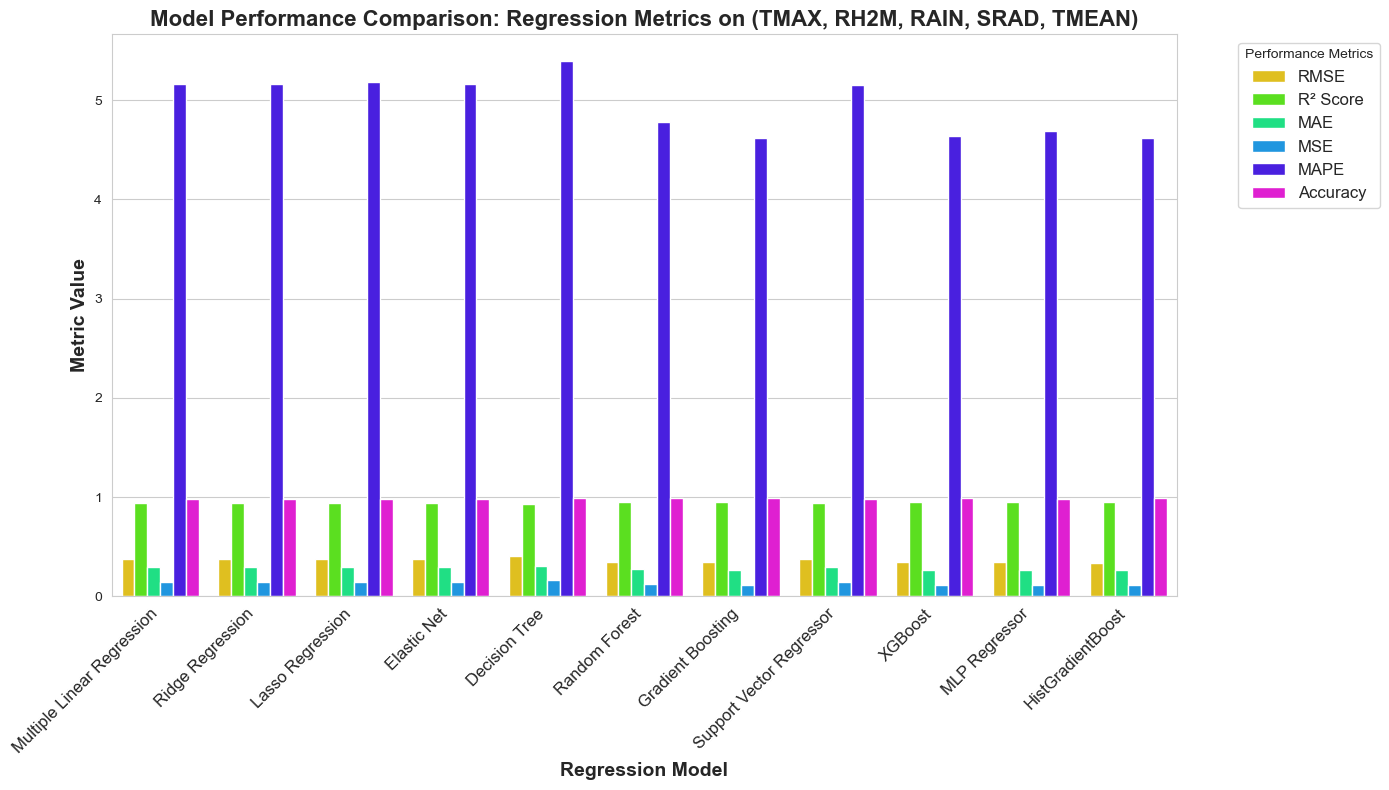

<Figure size 640x480 with 0 Axes>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ==============================
# Prepare Data
# ==============================

# Define model performance metrics
data = {
    'Model': ['Multiple Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Elastic Net', 'Decision Tree', 
              'Random Forest', 'Gradient Boosting', 'Support Vector Regressor', 'XGBoost', 'MLP Regressor', 'HistGradientBoost'],
    'RMSE': [0.380988, 0.380974, 0.378913, 0.380833, 0.404911, 0.349108, 0.345405, 0.380884, 0.346888, 0.347226, 0.341712],
    'R² Score': [0.937132, 0.937136, 0.937815, 0.937183, 0.928988, 0.947213, 0.948327, 0.937166, 0.947882, 0.947780, 0.949426],
    'MAE': [0.300753, 0.300748, 0.299841, 0.300660, 0.311907, 0.276337, 0.268379, 0.300157, 0.269499, 0.271346, 0.266810],
    'MSE': [0.145152, 0.145141, 0.143575, 0.145034, 0.163953, 0.121877, 0.119304, 0.145073, 0.120332, 0.120566, 0.116767],
    'MAPE': [5.160260, 5.160474, 5.187618, 5.159540, 5.392779, 4.777117, 4.621908, 5.151711, 4.642713, 4.686099, 4.614740],
    'Accuracy': [0.983908, 0.983902, 0.984627, 0.983898, 0.988445, 0.988696, 0.989730, 0.983954, 0.989626, 0.987289, 0.989669]
}

# Convert dictionary to pandas DataFrame
df = pd.DataFrame(data)

# Reshape DataFrame for Seaborn compatibility
df_melted = df.melt(id_vars=['Model'], var_name='Metric', value_name='Value')

# ==============================
# Visualization
# ==============================

# Set the style for better aesthetics
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Use a color palette for distinct metric representation
palette = sns.color_palette("hsv", len(df_melted['Metric'].unique()))

# Create a grouped bar plot
sns.barplot(x='Model', y='Value', hue='Metric', data=df_melted, palette=palette)

# Improve plot labels and title
plt.title('Model Performance Comparison: Regression Metrics on (TMAX, RH2M, RAIN, SRAD, TMEAN)', fontsize=16, fontweight='bold')
plt.xlabel('Regression Model', fontsize=14, fontweight='bold')
plt.ylabel('Metric Value', fontsize=14, fontweight='bold')

# Adjust x-ticks for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Optimize legend placement
plt.legend(title='Performance Metrics', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Optimize layout and display
plt.tight_layout()
plt.show()

# ==============================
# Save Plot for Publication
# ==============================

# Save the figure as a high-resolution image
plt.savefig("model_performance_comparison.png", dpi=300, bbox_inches='tight')


SRAD, TMAX, TMEAN

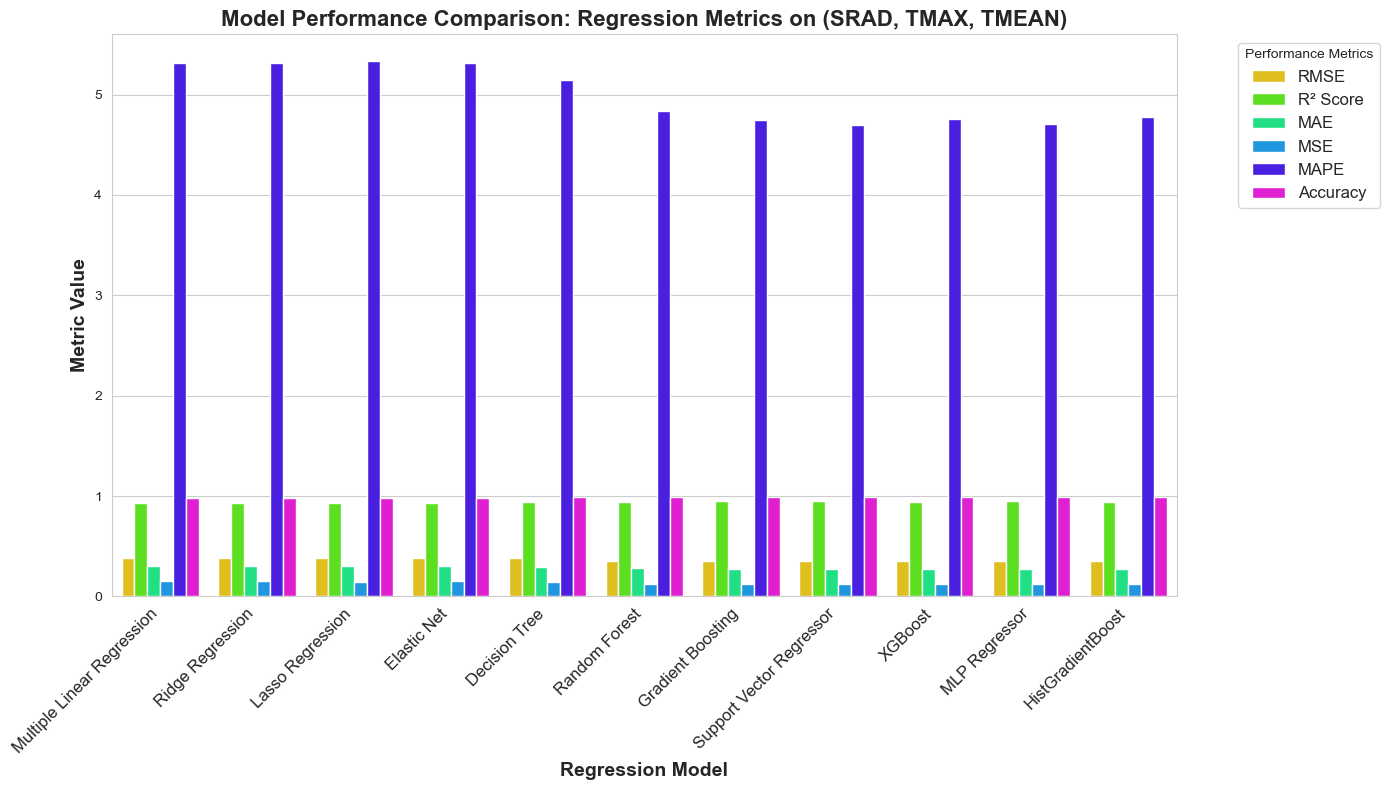

<Figure size 640x480 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ==============================
# Prepare Data
# ==============================

# Define model performance metrics
data = {
    'Model': ['Multiple Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Elastic Net', 'Decision Tree', 
              'Random Forest', 'Gradient Boosting', 'Support Vector Regressor', 'XGBoost', 'MLP Regressor', 'HistGradientBoost'],
    'RMSE': [0.388361, 0.388355, 0.385968, 0.388345, 0.379565, 0.355329, 0.351591, 0.350091, 0.353360, 0.351289, 0.352495],
    'R² Score': [0.934675, 0.934677, 0.935477, 0.934680, 0.937600, 0.945315, 0.946459, 0.946915, 0.945919, 0.946551, 0.946184],
    'MAE': [0.307898, 0.307891, 0.306398, 0.307882, 0.297571, 0.280440, 0.276392, 0.275155, 0.277535, 0.273299, 0.277430],
    'MSE': [0.150825, 0.150820, 0.148972, 0.150812, 0.144070, 0.126259, 0.123616, 0.122564, 0.124863, 0.123404, 0.124252],
    'MAPE': [5.317753, 5.317865, 5.331780, 5.317782, 5.145823, 4.833309, 4.744551, 4.701528, 4.759342, 4.706672, 4.771383],
    'Accuracy': [0.982711, 0.982710, 0.984507, 0.982711, 0.991583, 0.990811, 0.988901, 0.987499, 0.989059, 0.989354, 0.989203]
}

# Convert dictionary to pandas DataFrame
df = pd.DataFrame(data)

# Reshape DataFrame for Seaborn compatibility
df_melted = df.melt(id_vars=['Model'], var_name='Metric', value_name='Value')

# ==============================
# Visualization
# ==============================

# Set the style for better aesthetics
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Use a color palette for distinct metric representation
palette = sns.color_palette("hsv", len(df_melted['Metric'].unique()))

# Create a grouped bar plot
sns.barplot(x='Model', y='Value', hue='Metric', data=df_melted, palette=palette)

# Improve plot labels and title
plt.title('Model Performance Comparison: Regression Metrics on (SRAD, TMAX, TMEAN)', fontsize=16, fontweight='bold')
plt.xlabel('Regression Model', fontsize=14, fontweight='bold')
plt.ylabel('Metric Value', fontsize=14, fontweight='bold')

# Adjust x-ticks for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Optimize legend placement
plt.legend(title='Performance Metrics', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Optimize layout and display
plt.tight_layout()
plt.show()

# ==============================
# Save Plot for Publication
# ==============================

# Save the figure as a high-resolution image
plt.savefig("model_performance_comparison.png", dpi=300, bbox_inches='tight')


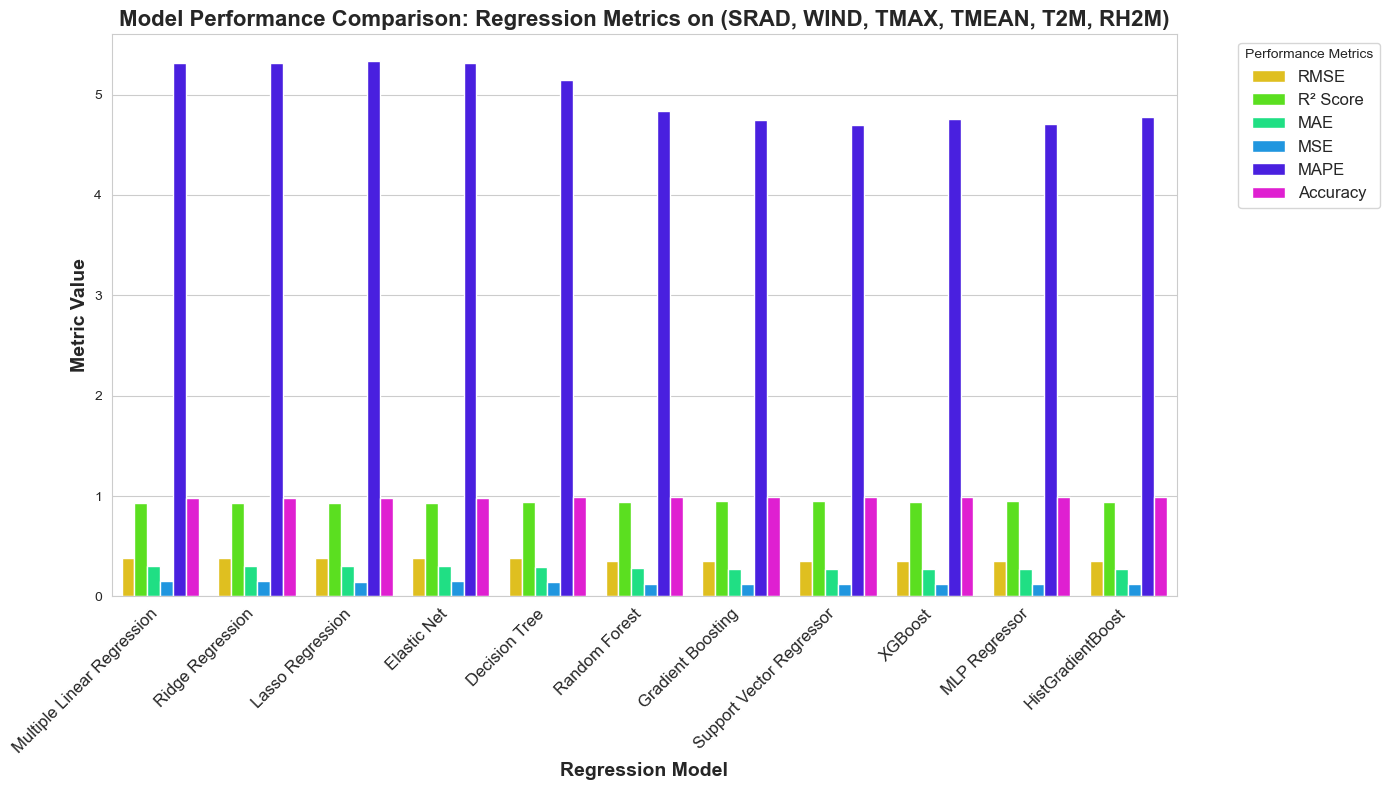

<Figure size 640x480 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ==============================
# Prepare Data
# ==============================

# Define model performance metrics
data3 = {
    'Model': ['Multiple Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Elastic Net', 'Decision Tree', 
              'Random Forest', 'Gradient Boosting', 'Support Vector Regressor', 'XGBoost', 'MLP Regressor', 'HistGradientBoost'],
    'RMSE': [0.002288, 0.002295, 0.029068, 0.002307, 0.148845, 0.054673, 0.028591, 0.132160, 0.035629, 0.032608, 0.034991],
    'R² Score': [0.999998, 0.999998, 0.999634, 0.999998, 0.990404, 0.998705, 0.999646, 0.992435, 0.999450, 0.999539, 0.999470],
    'MAE': [0.001470, 0.001500, 0.022455, 0.001533, 0.115685, 0.035252, 0.021687, 0.103450, 0.023134, 0.024077, 0.022851],
    'MSE': [0.000005, 0.000005, 0.000845, 0.000005, 0.022155, 0.002989, 0.000817, 0.017466, 0.001269, 0.001063, 0.001224],
    'MAPE': [0.022611, 0.023533, 0.419435, 0.024006, 2.018791, 0.646822, 0.380049, 1.682929, 0.434919, 0.410388, 0.439344],
    'Accuracy': [0.999999, 0.999991, 0.998566, 0.999997, 0.998461, 0.999378, 0.999836, 0.993389, 0.999995, 0.999210, 0.999842]
}

# Convert dictionary to pandas DataFrame
df = pd.DataFrame(data)

# Reshape DataFrame for Seaborn compatibility
df_melted = df.melt(id_vars=['Model'], var_name='Metric', value_name='Value')

# ==============================
# Visualization
# ==============================

# Set the style for better aesthetics
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Use a color palette for distinct metric representation
palette = sns.color_palette("hsv", len(df_melted['Metric'].unique()))

# Create a grouped bar plot
sns.barplot(x='Model', y='Value', hue='Metric', data=df_melted, palette=palette)

# Improve plot labels and title
plt.title('Model Performance Comparison: Regression Metrics on (SRAD, WIND, TMAX, TMEAN, T2M, RH2M)', fontsize=16, fontweight='bold')
plt.xlabel('Regression Model', fontsize=14, fontweight='bold')
plt.ylabel('Metric Value', fontsize=14, fontweight='bold')

# Adjust x-ticks for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Optimize legend placement
plt.legend(title='Performance Metrics', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Optimize layout and display
plt.tight_layout()
plt.show()

# ==============================
# Save Plot for Publication
# ==============================

# Save the figure as a high-resolution image
plt.savefig("model_performance_comparison.png", dpi=300, bbox_inches='tight')


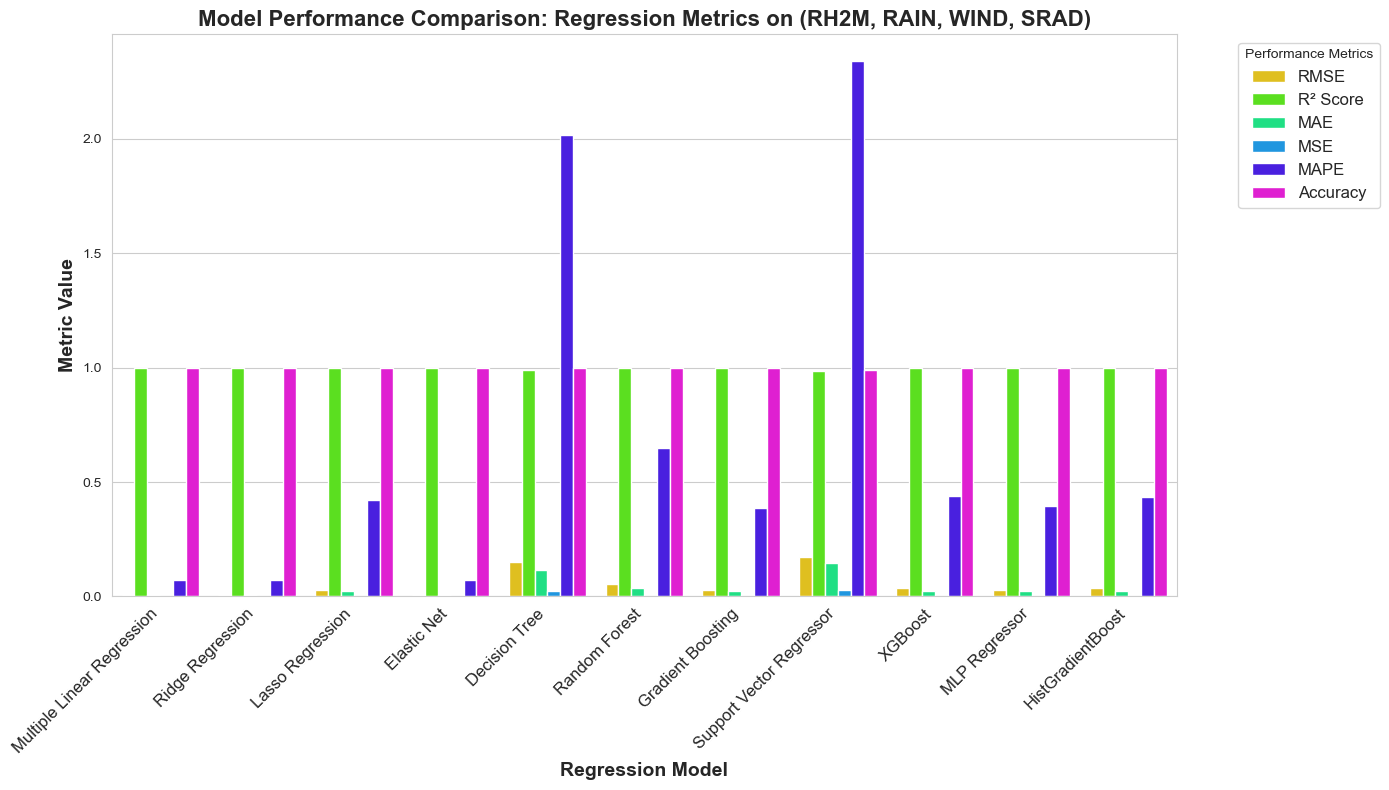

<Figure size 640x480 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ==============================
# Prepare Data
# ==============================

# Define model performance metrics
data = {
    'Model': ['Multiple Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Elastic Net', 'Decision Tree', 
              'Random Forest', 'Gradient Boosting', 'Support Vector Regressor', 'XGBoost', 'MLP Regressor', 'HistGradientBoost'],
    'RMSE': [0.006137, 0.006152, 0.029093, 0.006151, 0.148845, 0.054874, 0.028877, 0.170793, 0.035952, 0.029924, 0.035449],
    'R² Score': [0.999984, 0.999984, 0.999633, 0.999984, 0.990404, 0.998696, 0.999639, 0.987366, 0.999440, 0.999612, 0.999456],
    'MAE': [0.004641, 0.004673, 0.022475, 0.004669, 0.115685, 0.035584, 0.022078, 0.145198, 0.023340, 0.022782, 0.022443],
    'MSE': [0.000038, 0.000038, 0.000846, 0.000038, 0.022155, 0.003011, 0.000834, 0.029170, 0.001293, 0.000895, 0.001257],
    'MAPE': [0.072652, 0.073713, 0.419806, 0.073744, 2.018791, 0.649565, 0.386244, 2.339455, 0.439349, 0.395427, 0.436262],
    'Accuracy': [0.999669, 0.999664, 0.998565, 0.999663, 0.998461, 0.999342, 0.999617, 0.990447, 0.999770, 0.999961, 0.999580]
}

# Convert dictionary to pandas DataFrame
df = pd.DataFrame(data)

# Reshape DataFrame for Seaborn compatibility
df_melted = df.melt(id_vars=['Model'], var_name='Metric', value_name='Value')

# ==============================
# Visualization
# ==============================

# Set the style for better aesthetics
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Use a color palette for distinct metric representation
palette = sns.color_palette("hsv", len(df_melted['Metric'].unique()))

# Create a grouped bar plot
sns.barplot(x='Model', y='Value', hue='Metric', data=df_melted, palette=palette)

# Improve plot labels and title
plt.title('Model Performance Comparison: Regression Metrics on (RH2M, RAIN, WIND, SRAD)', fontsize=16, fontweight='bold')
plt.xlabel('Regression Model', fontsize=14, fontweight='bold')
plt.ylabel('Metric Value', fontsize=14, fontweight='bold')

# Adjust x-ticks for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Optimize legend placement
plt.legend(title='Performance Metrics', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Optimize layout and display
plt.tight_layout()
plt.show()

# ==============================
# Save Plot for Publication
# ==============================

# Save the figure as a high-resolution image
plt.savefig("model_performance_comparison.png", dpi=300, bbox_inches='tight')


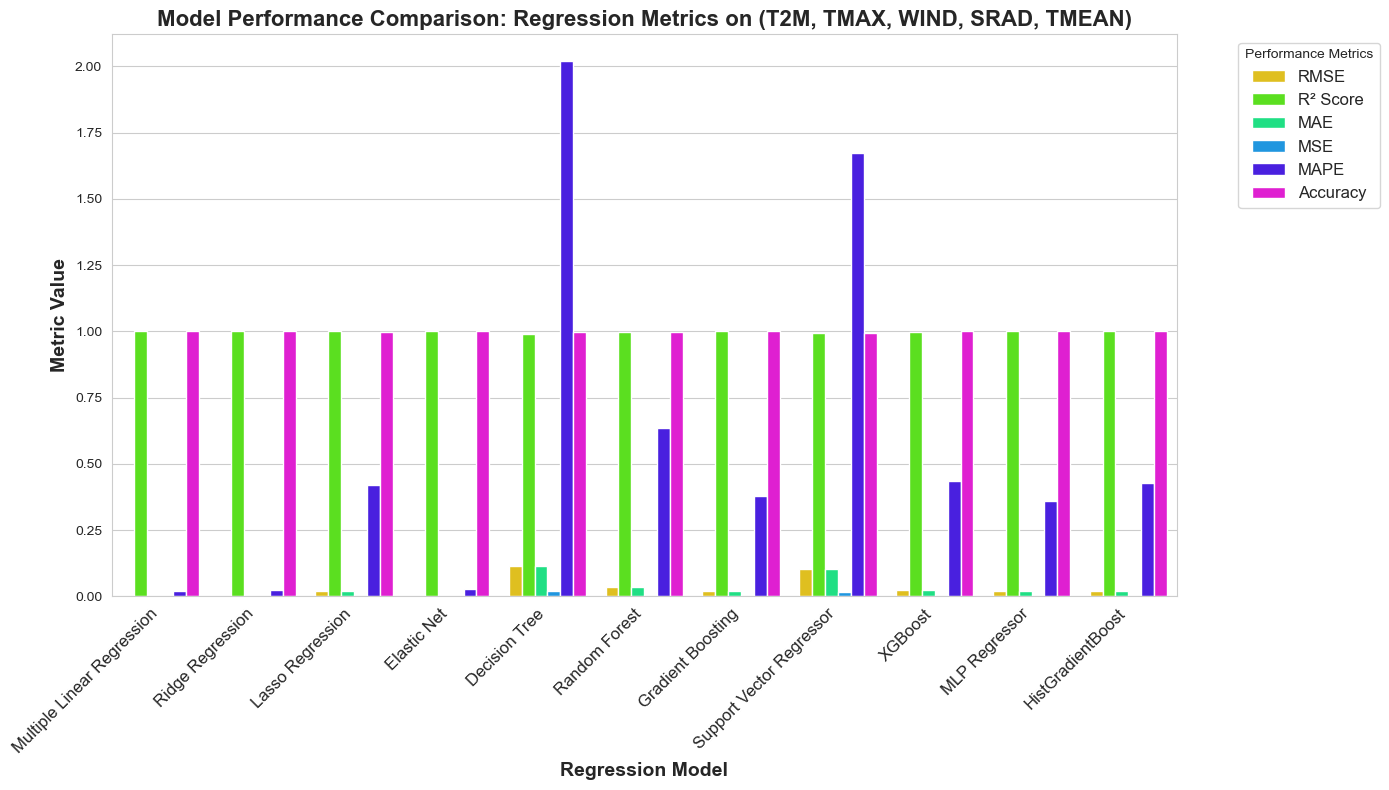

<Figure size 640x480 with 0 Axes>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ==============================
# Prepare Data
# ==============================

# Define model performance metrics
data = {
    'Model': ['Multiple Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Elastic Net', 'Decision Tree', 
              'Random Forest', 'Gradient Boosting', 'Support Vector Regressor', 'XGBoost', 'MLP Regressor', 'HistGradientBoost'],
    'RMSE': [0.001469, 0.001498, 0.022456, 0.001923, 0.115685, 0.034649, 0.021612, 0.103282, 0.023294, 0.021317, 0.022498],
    'R² Score': [0.999998, 0.999998, 0.999634, 0.999997, 0.990404, 0.998753, 0.999648, 0.992200, 0.999448, 0.999655, 0.999486],
    'MAE': [0.001469, 0.001498, 0.022456, 0.001923, 0.115685, 0.034649, 0.021612, 0.103282, 0.023294, 0.021317, 0.022498],
    'MSE': [0.000005, 0.000005, 0.000845, 0.000007, 0.022155, 0.002878, 0.000812, 0.018008, 0.001275, 0.000798, 0.001186],
    'MAPE': [0.022598, 0.023506, 0.419482, 0.029988, 2.018791, 0.636305, 0.378039, 1.672963, 0.436171, 0.361931, 0.428482],
    'Accuracy': [0.999999, 0.999991, 0.998566, 0.999934, 0.998461, 0.999296, 0.999855, 0.995147, 0.999974, 0.999604, 0.999773]
}

# Convert dictionary to pandas DataFrame
df = pd.DataFrame(data)

# Reshape DataFrame for Seaborn compatibility
df_melted = df.melt(id_vars=['Model'], var_name='Metric', value_name='Value')

# ==============================
# Visualization
# ==============================

# Set the style for better aesthetics
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Use a color palette for distinct metric representation
palette = sns.color_palette("hsv", len(df_melted['Metric'].unique()))

# Create a grouped bar plot
sns.barplot(x='Model', y='Value', hue='Metric', data=df_melted, palette=palette)

# Improve plot labels and title
plt.title('Model Performance Comparison: Regression Metrics on (T2M, TMAX, WIND, SRAD, TMEAN)', fontsize=16, fontweight='bold')
plt.xlabel('Regression Model', fontsize=14, fontweight='bold')
plt.ylabel('Metric Value', fontsize=14, fontweight='bold')

# Adjust x-ticks for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Optimize legend placement
plt.legend(title='Performance Metrics', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Optimize layout and display
plt.tight_layout()
plt.show()

# ==============================
# Save Plot for Publication
# ==============================

# Save the figure as a high-resolution image
plt.savefig("model_performance_comparison.png", dpi=300, bbox_inches='tight')


In [2]:
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv(r"C:\Users\neevb\OneDrive\Desktop\new_data_final_year\analysis\Data_ETo_PM.csv")
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce', dayfirst=True)
df.set_index('DATE', inplace=True)

In [3]:
df.columns

Index(['T2M', 'TMIN', 'TMAX', 'TDEW', 'RH2M', 'RAIN', 'WIND', 'SRAD', 'TMEAN',
       'ET0_PM'],
      dtype='object')

Analyzing combination: ('TMAX', 'RH2M', 'RAIN', 'SRAD', 'TMEAN')


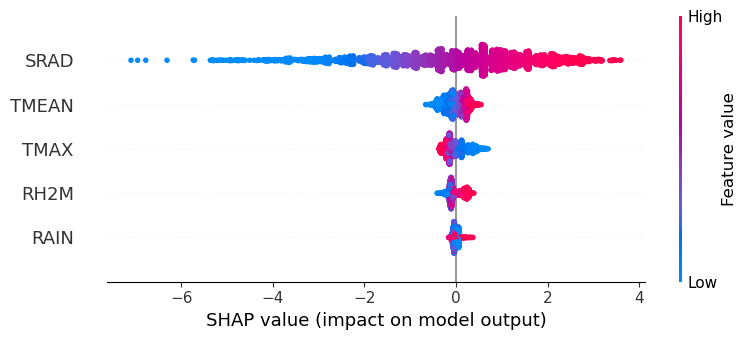

Completed analysis for combination: ('TMAX', 'RH2M', 'RAIN', 'SRAD', 'TMEAN')

Analyzing combination: ('SRAD', 'TMAX', 'TMEAN')


  0%|          | 0/3213 [00:00<?, ?it/s]

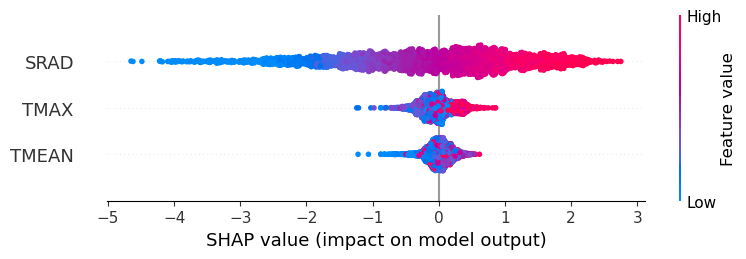

Completed analysis for combination: ('SRAD', 'TMAX', 'TMEAN')

Analyzing combination: ('SRAD', 'WIND', 'TMAX', 'TMEAN', 'T2M', 'RH2M')


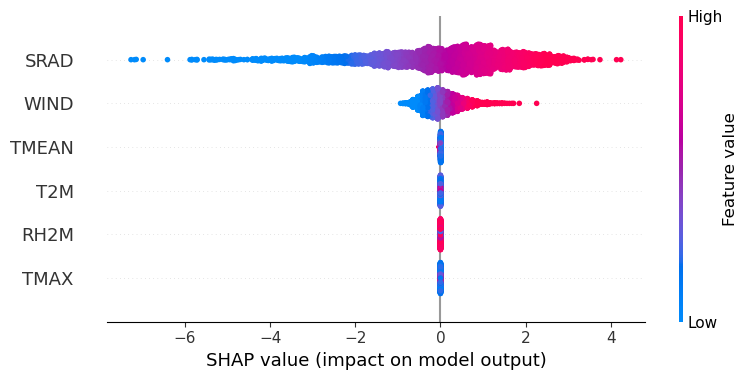

Completed analysis for combination: ('SRAD', 'WIND', 'TMAX', 'TMEAN', 'T2M', 'RH2M')

Analyzing combination: ('RH2M', 'RAIN', 'WIND', 'SRAD')


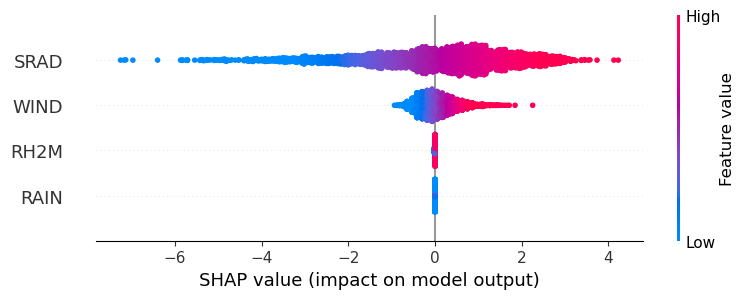

Completed analysis for combination: ('RH2M', 'RAIN', 'WIND', 'SRAD')

Analyzing combination: ('T2M', 'TMAX', 'WIND', 'SRAD', 'TMEAN')


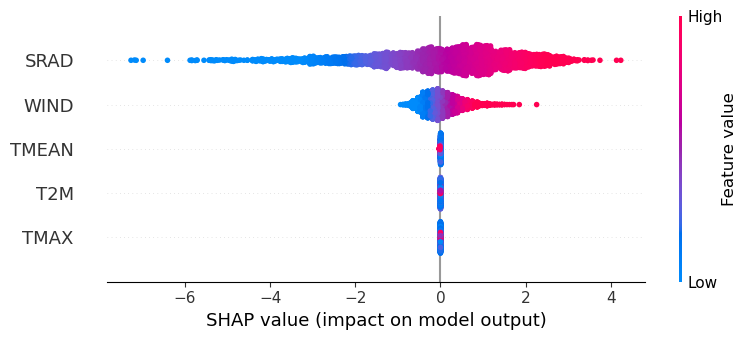

Completed analysis for combination: ('T2M', 'TMAX', 'WIND', 'SRAD', 'TMEAN')



In [2]:
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm impor
t SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Load and preprocess data
df = pd.read_csv(r"C:\Users\neevb\OneDrive\Desktop\new_data_final_year\analysis\Data_ETo_PM.csv")
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce', dayfirst=True)
df.set_index('DATE', inplace=True)

# Define features and target
target_column = 'ET0_PM'  # Replace with the name of your target variable
feature_columns = ['T2M', 'TMIN', 'TMAX', 'TDEW', 'RH2M', 'RAIN', 'WIND', 'SRAD', 'TMEAN']  # Add all relevant features here

X = df[feature_columns]
y = df[target_column]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define feature subsets and models
combinations = {
    ('TMAX', 'RH2M', 'RAIN', 'SRAD', 'TMEAN'): GradientBoostingRegressor(
        n_estimators=300, learning_rate=0.1, max_depth=3, min_samples_split=10, min_samples_leaf=4),
    ('SRAD', 'TMAX', 'TMEAN'): SVR(kernel='rbf', C=10.0, epsilon=0.2, gamma='auto'),
    ('SRAD', 'WIND', 'TMAX', 'TMEAN', 'T2M', 'RH2M'): LinearRegression(),
    ('RH2M', 'RAIN', 'WIND', 'SRAD'): LinearRegression(),
    ('T2M', 'TMAX', 'WIND', 'SRAD', 'TMEAN'): LinearRegression()
}

# Iterate through each feature combination and model
for features, model in combinations.items():
    print(f"Analyzing combination: {features}")

    # Create the feature subset
    X_train_subset = X_train[list(features)]
    X_test_subset = X_test[list(features)]

    # Train the model
    model.fit(X_train_subset, y_train)

    # Select appropriate SHAP explainer
    if isinstance(model, GradientBoostingRegressor):
        explainer = shap.Explainer(model, X_train_subset)
        shap_values = explainer(X_test_subset, check_additivity=False)
    elif isinstance(model, SVR):
        # Sample the background data to 100 samples to speed up computation
        background = shap.sample(X_train_subset, 100, random_state=42)
        explainer = shap.KernelExplainer(model.predict, background)
        shap_values = explainer.shap_values(X_test_subset, nsamples=100)  # Reduce nsamples for faster computation
    elif isinstance(model, LinearRegression):
        explainer = shap.LinearExplainer(model, X_train_subset)
        shap_values = explainer(X_test_subset)
    else:
        raise ValueError("Unsupported model type")

    # Visualize SHAP summary plot
    shap.summary_plot(shap_values, X_test_subset, feature_names=list(features))

    # Optional: Analyze specific instance
    # index = 0  # Example index
    # shap.waterfall_plot(shap_values[index], feature_names=list(features))

    print(f"Completed analysis for combination: {features}\n")


Training model with features: ('TMAX', 'RH2M', 'RAIN', 'SRAD', 'TMEAN')
Training model with features: ('SRAD', 'TMAX', 'TMEAN')
Training model with features: ('SRAD', 'WIND', 'TMAX', 'TMEAN', 'T2M', 'RH2M')
Training model with features: ('RH2M', 'RAIN', 'WIND', 'SRAD')
Training model with features: ('T2M', 'TMAX', 'WIND', 'SRAD', 'TMEAN')


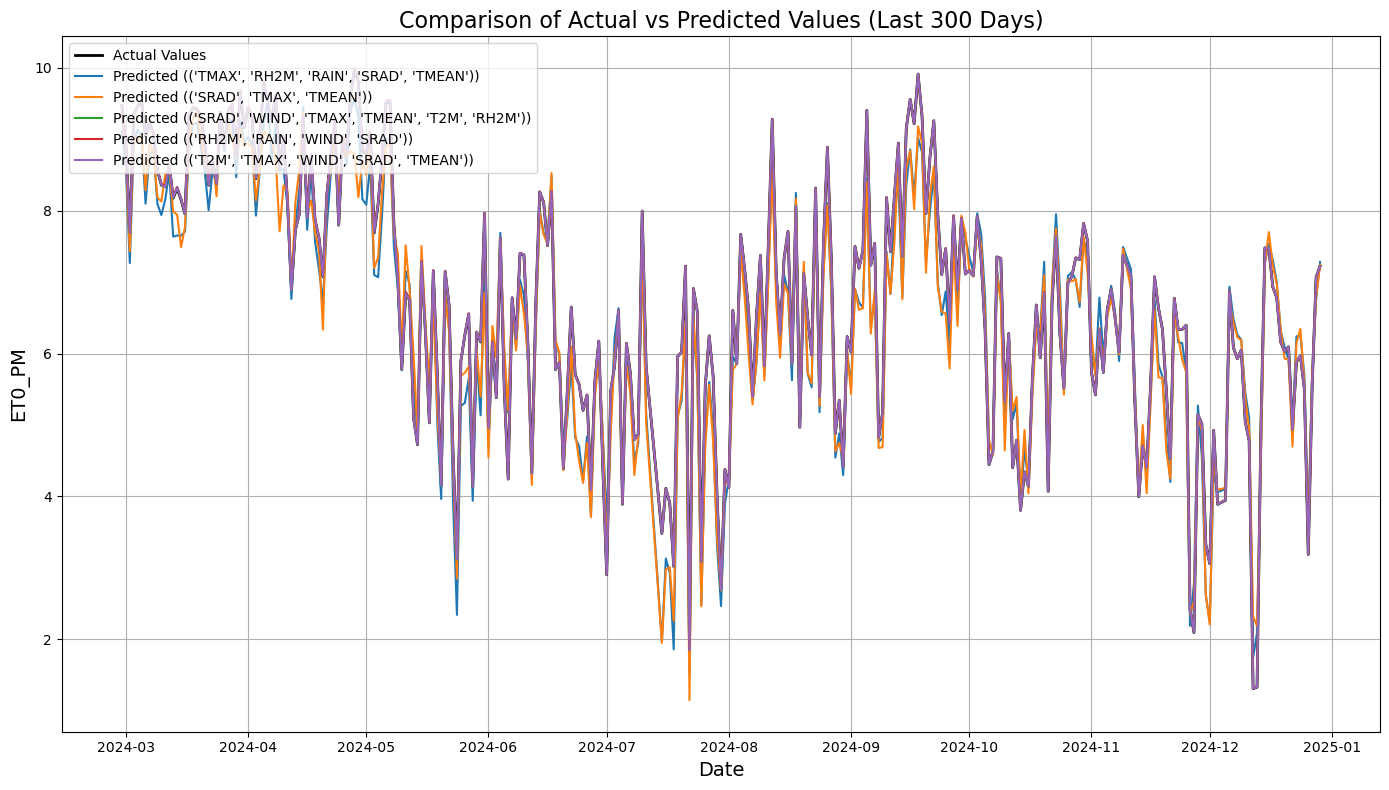

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load and preprocess data
df = pd.read_csv(r"C:\Users\neevb\OneDrive\Desktop\new_data_final_year\analysis\Data_ETo_PM.csv")
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce', dayfirst=True)
df.set_index('DATE', inplace=True)

# Define features and target
target_column = 'ET0_PM'  # Replace with the name of your target variable
feature_columns = ['T2M', 'TMIN', 'TMAX', 'TDEW', 'RH2M', 'RAIN', 'WIND', 'SRAD', 'TMEAN']  # Add all relevant features here

X = df[feature_columns]
y = df[target_column]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False ,random_state=42)

# Define models and their feature combinations
combinations = {
    ('TMAX', 'RH2M', 'RAIN', 'SRAD', 'TMEAN'): GradientBoostingRegressor(
        n_estimators=300, learning_rate=0.1, max_depth=3, min_samples_split=10, min_samples_leaf=4),
    ('SRAD', 'TMAX', 'TMEAN'): SVR(kernel='rbf', C=10.0, epsilon=0.2, gamma='auto'),
    ('SRAD', 'WIND', 'TMAX', 'TMEAN', 'T2M', 'RH2M'): LinearRegression(),
    ('RH2M', 'RAIN', 'WIND', 'SRAD'): LinearRegression(),
    ('T2M', 'TMAX', 'WIND', 'SRAD', 'TMEAN'): LinearRegression()
}

# Store predictions for comparison
predictions = {}
actual_values = y_test.iloc[-300:]  # Last 100 days of test data

# Iterate through each model and feature combination
for features, model in combinations.items():
    print(f"Training model with features: {features}")
    
    # Subset the data
    X_train_subset = X_train[list(features)]
    X_test_subset = X_test[list(features)]
    
    # Train the model
    model.fit(X_train_subset, y_train)
    
    # Predict for the last 100 days in the test set
    last_100_test_subset = X_test_subset.iloc[-300:]
    predicted_values = model.predict(last_100_test_subset)
    
    # Store predictions for plotting
    predictions[features] = predicted_values

# Plot actual vs predicted values
plt.figure(figsize=(14, 8))
plt.plot(actual_values.index, actual_values, label='Actual Values', color='black', linewidth=2)

# Add predictions from each model
for features, predicted_values in predictions.items():
    plt.plot(actual_values.index, predicted_values, label=f'Predicted ({features})')

# Customize plot
plt.title("Comparison of Actual vs Predicted Values (Last 300 Days)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("ET0_PM", fontsize=14)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


Training model with features: ('TMAX', 'RH2M', 'RAIN', 'SRAD', 'TMEAN')
Training model with features: ('SRAD', 'TMAX', 'TMEAN')
Training model with features: ('SRAD', 'WIND', 'TMAX', 'TMEAN', 'T2M', 'RH2M')
Training model with features: ('RH2M', 'RAIN', 'WIND', 'SRAD')
Training model with features: ('T2M', 'TMAX', 'WIND', 'SRAD', 'TMEAN')


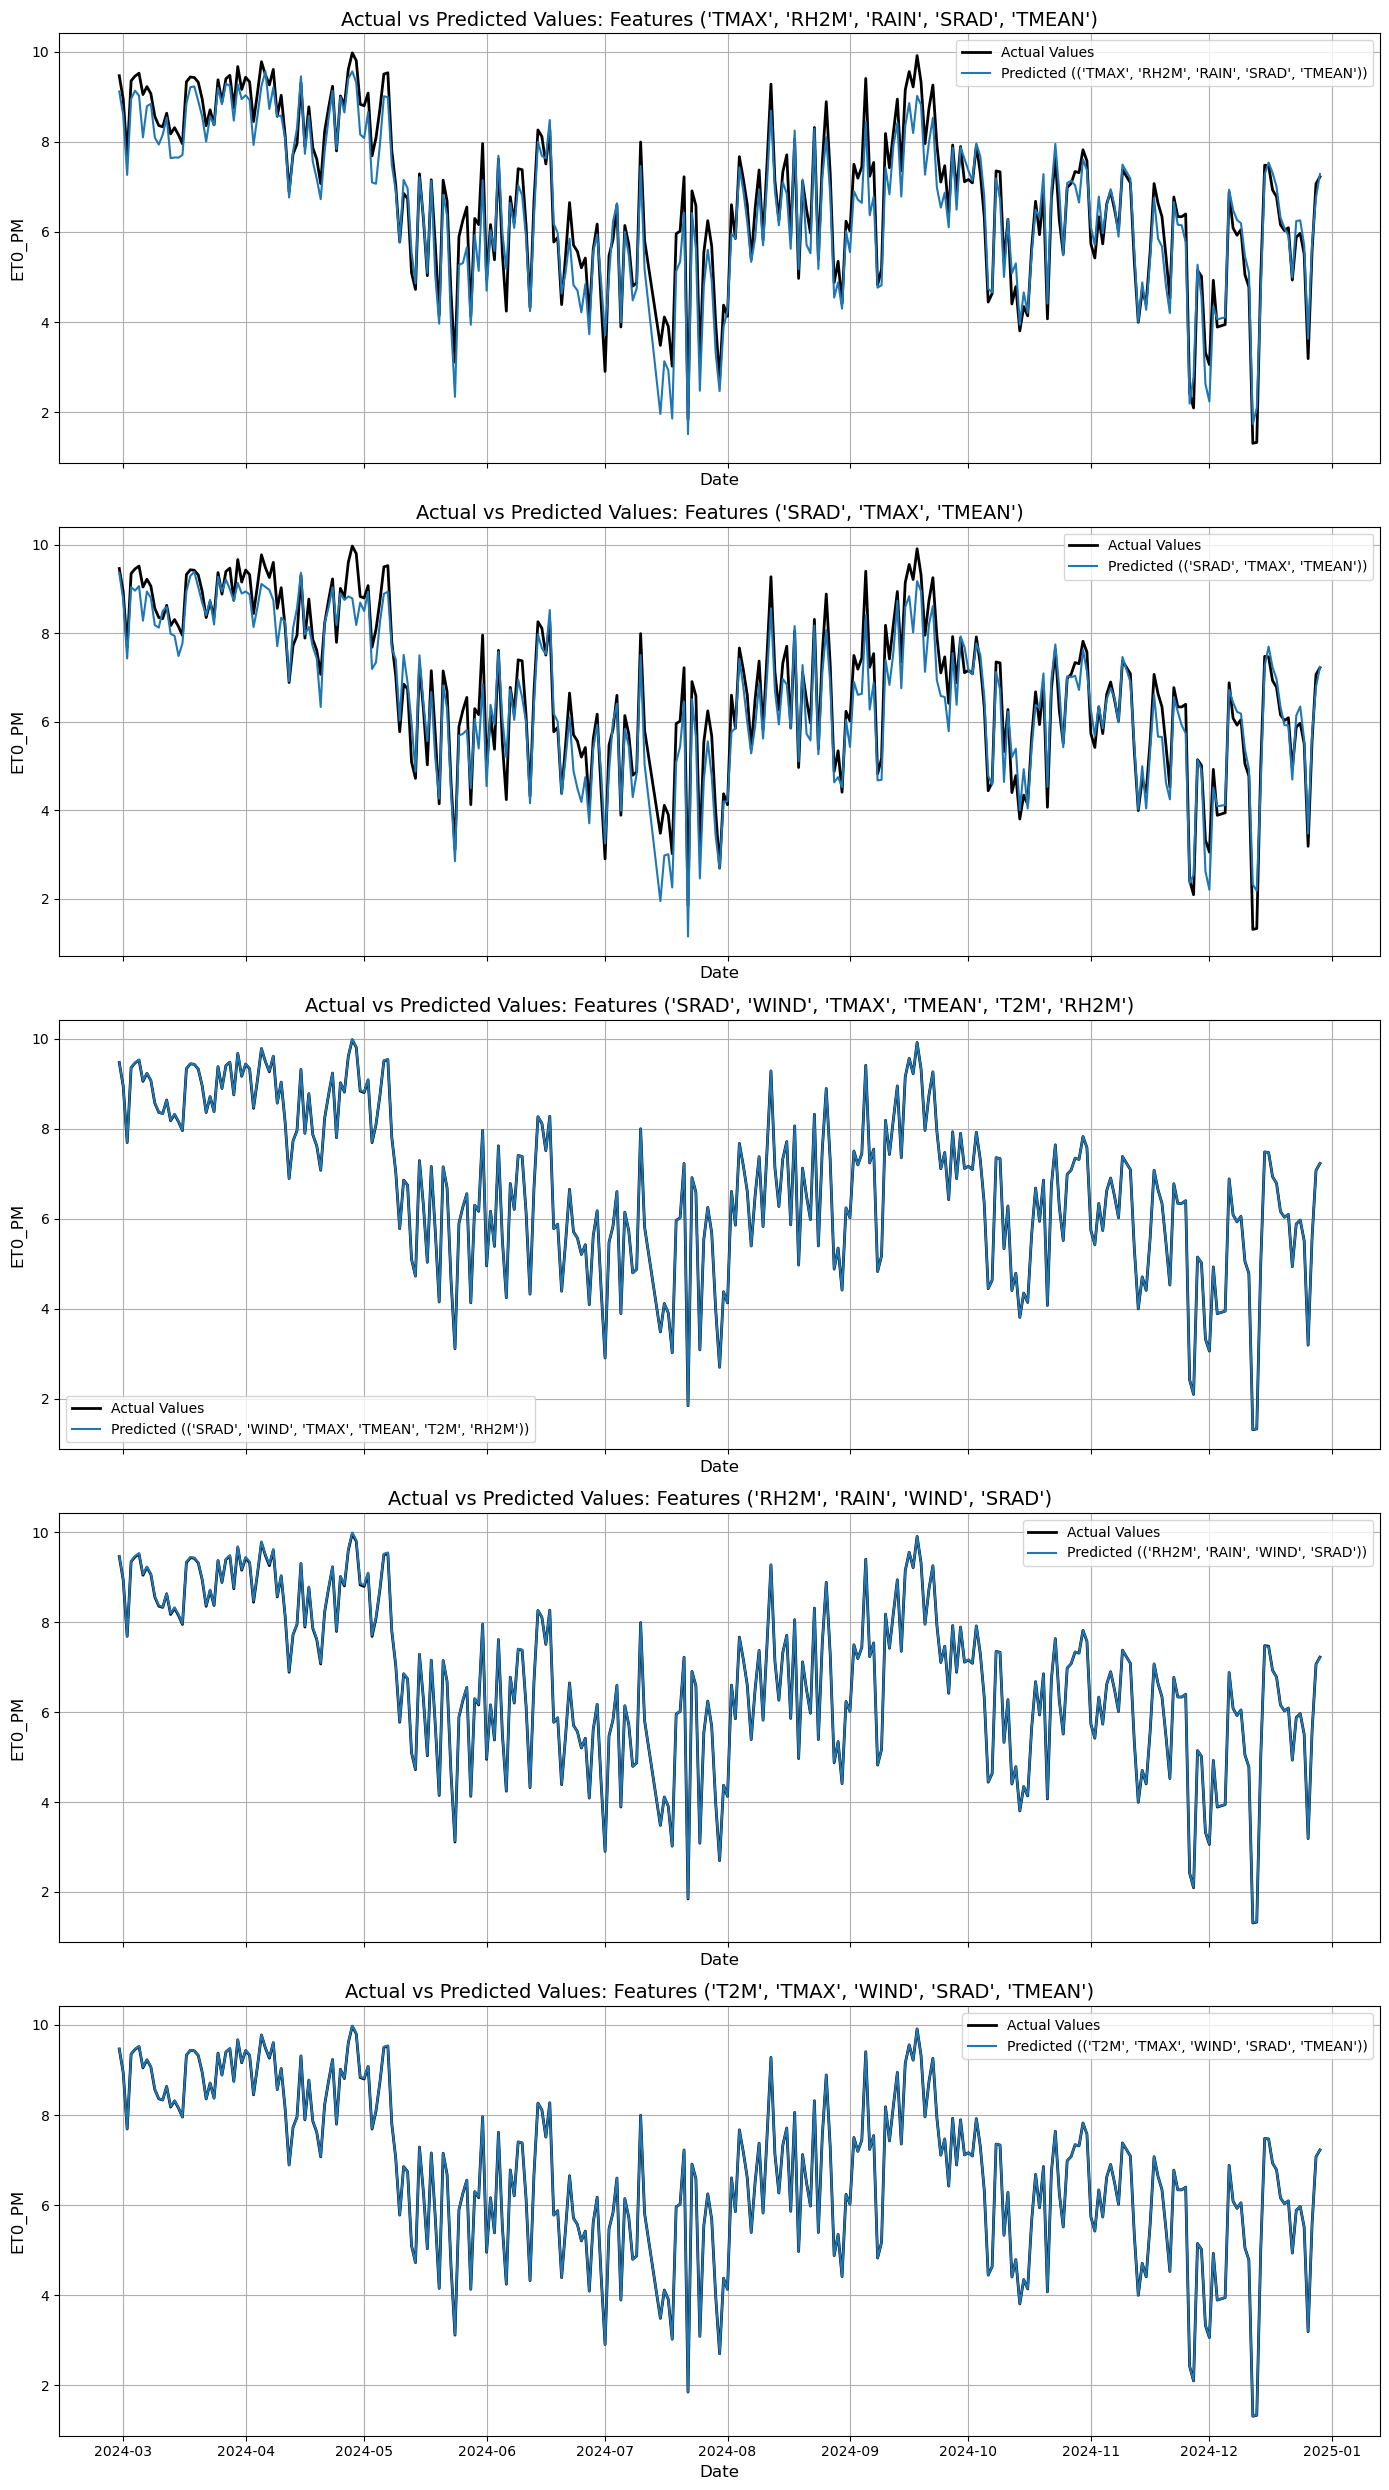

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load and preprocess data
df = pd.read_csv(r"C:\Users\neevb\OneDrive\Desktop\new_data_final_year\analysis\Data_ETo_PM.csv")
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce', dayfirst=True)
df.set_index('DATE', inplace=True)

# Define features and target
target_column = 'ET0_PM'
feature_columns = ['T2M', 'TMIN', 'TMAX', 'TDEW', 'RH2M', 'RAIN', 'WIND', 'SRAD', 'TMEAN']

X = df[feature_columns]
y = df[target_column]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# Define models and their feature combinations
combinations = {
    ('TMAX', 'RH2M', 'RAIN', 'SRAD', 'TMEAN'): GradientBoostingRegressor(
        n_estimators=300, learning_rate=0.1, max_depth=3, min_samples_split=10, min_samples_leaf=4),
    ('SRAD', 'TMAX', 'TMEAN'): SVR(kernel='rbf', C=10.0, epsilon=0.2, gamma='auto'),
    ('SRAD', 'WIND', 'TMAX', 'TMEAN', 'T2M', 'RH2M'): LinearRegression(),
    ('RH2M', 'RAIN', 'WIND', 'SRAD'): LinearRegression(),
    ('T2M', 'TMAX', 'WIND', 'SRAD', 'TMEAN'): LinearRegression()
}

# Store predictions for comparison
predictions = {}
actual_values = y_test.iloc[-300:]  # Last 300 days of test data

# Iterate through each model and feature combination
for features, model in combinations.items():
    print(f"Training model with features: {features}")
    
    # Subset the data
    X_train_subset = X_train[list(features)]
    X_test_subset = X_test[list(features)]
    
    # Train the model
    model.fit(X_train_subset, y_train)
    
    # Predict for the last 300 days in the test set
    last_100_test_subset = X_test_subset.iloc[-300:]
    predicted_values = model.predict(last_100_test_subset)
    
    # Store predictions for plotting
    predictions[features] = predicted_values

# Create subplots
num_models = len(combinations)
fig, axes = plt.subplots(num_models, 1, figsize=(14, 5 * num_models), sharex=True)

for ax, (features, predicted_values) in zip(axes, predictions.items()):
    ax.plot(actual_values.index, actual_values, label='Actual Values', color='black', linewidth=2)
    ax.plot(actual_values.index, predicted_values, label=f'Predicted ({features})')
    ax.set_title(f"Actual vs Predicted Values: Features {features}", fontsize=14)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("ET0_PM", fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor

# Load and preprocess data
df = pd.read_csv(r"C:\Users\neevb\OneDrive\Desktop\new_data_final_year\analysis\Data_ETo_PM.csv")
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce', dayfirst=True)
df.set_index('DATE', inplace=True)

# Define features and target
target_column = 'ET0_PM'  # Target variable
feature_columns = ['T2M', 'TMIN', 'TMAX', 'TDEW', 'RH2M', 'RAIN', 'WIND', 'SRAD', 'TMEAN']

X = df[feature_columns]
y = df[target_column]

# Define minimum number of features to consider
min_features_to_select = 3

# Initialize the model
regressor = RandomForestRegressor(n_estimators=100, max_depth=8, min_samples_split=8, min_samples_leaf=4)

# Use KFold for cross-validation
cv = KFold(n_splits=5, shuffle=False)

# Initialize RFECV
rfecv = RFECV(
    estimator=regressor,
    step=1,
    cv=cv,
    scoring="neg_mean_squared_error",  # Regression scoring metric
    min_features_to_select=min_features_to_select,
    n_jobs=-1,
)

# Fit RFECV to the data
rfecv.fit(X, y)

# Print the optimal number of features and the selected features
optimal_features = X.columns[rfecv.support_]
print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Selected features: {list(optimal_features)}")


Optimal number of features: 3
Selected features: ['RH2M', 'WIND', 'SRAD']


In [8]:
import pandas as pd
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor

# Load and preprocess data
df = pd.read_csv(r"C:\Users\neevb\OneDrive\Desktop\new_data_final_year\analysis\Data_ETo_PM.csv")
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce', dayfirst=True)
df.set_index('DATE', inplace=True)

# Define features and target
target_column = 'ET0_PM'  # Target variable
feature_columns = ['T2M', 'TMIN', 'TMAX', 'TDEW', 'RH2M', 'RAIN', 'WIND', 'SRAD', 'TMEAN']

X = df[feature_columns]
y = df[target_column]

# Define minimum number of features to consider
min_features_to_select = 4

# Initialize the model
regressor = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=3, min_samples_split=10, min_samples_leaf=4)

# Use KFold for cross-validation
cv = KFold(n_splits=5, shuffle=False)

# Initialize RFECV
rfecv = RFECV(
    estimator=regressor,
    step=1,
    cv=cv,
    scoring="neg_mean_squared_error",  # Regression scoring metric
    min_features_to_select=min_features_to_select,
    n_jobs=-1,
)

# Fit RFECV to the data
rfecv.fit(X, y)

# Print the optimal number of features and the selected features
optimal_features = X.columns[rfecv.support_]
print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Selected features: {list(optimal_features)}")

Optimal number of features: 4
Selected features: ['T2M', 'WIND', 'SRAD', 'TMEAN']


In [9]:
import pandas as pd
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor

# Load and preprocess data
df = pd.read_csv(r"C:\Users\neevb\OneDrive\Desktop\new_data_final_year\analysis\Data_ETo_PM.csv")
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce', dayfirst=True)
df.set_index('DATE', inplace=True)

# Define features and target
target_column = 'ET0_PM'  # Target variable
feature_columns = ['T2M', 'TMIN', 'TMAX', 'TDEW', 'RH2M', 'RAIN', 'WIND', 'SRAD', 'TMEAN']

X = df[feature_columns]
y = df[target_column]

# Define minimum number of features to consider
min_features_to_select = 3

# Initialize the model
regressor = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=3, min_samples_split=10, min_samples_leaf=4)

# Use KFold for cross-validation
cv = KFold(n_splits=5, shuffle=False)

# Initialize RFECV
rfecv = RFECV(
    estimator=regressor,
    step=1,
    cv=cv,
    scoring="neg_mean_squared_error",  # Regression scoring metric
    min_features_to_select=min_features_to_select,
    n_jobs=-1,
)

# Fit RFECV to the data
rfecv.fit(X, y)

# Print the optimal number of features and the selected features
optimal_features = X.columns[rfecv.support_]
print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Selected features: {list(optimal_features)}")

Optimal number of features: 3
Selected features: ['T2M', 'WIND', 'SRAD']


2025-01-22 22:07:20,668 - pyswarms.discrete.binary - INFO - Optimize for 50 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 3, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|50/50, best_cost=4.39e-6
2025-01-22 22:07:32,672 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 4.393004597792899e-06, best pos: [1 1 0 1 1 1 1 1 1]


Best Feature Subset: ['T2M', 'TMIN', 'TDEW', 'RH2M', 'RAIN', 'WIND', 'SRAD', 'TMEAN']
Best Cost (MSE): 4.393004597792899e-06
Final Model MSE: 0.0000


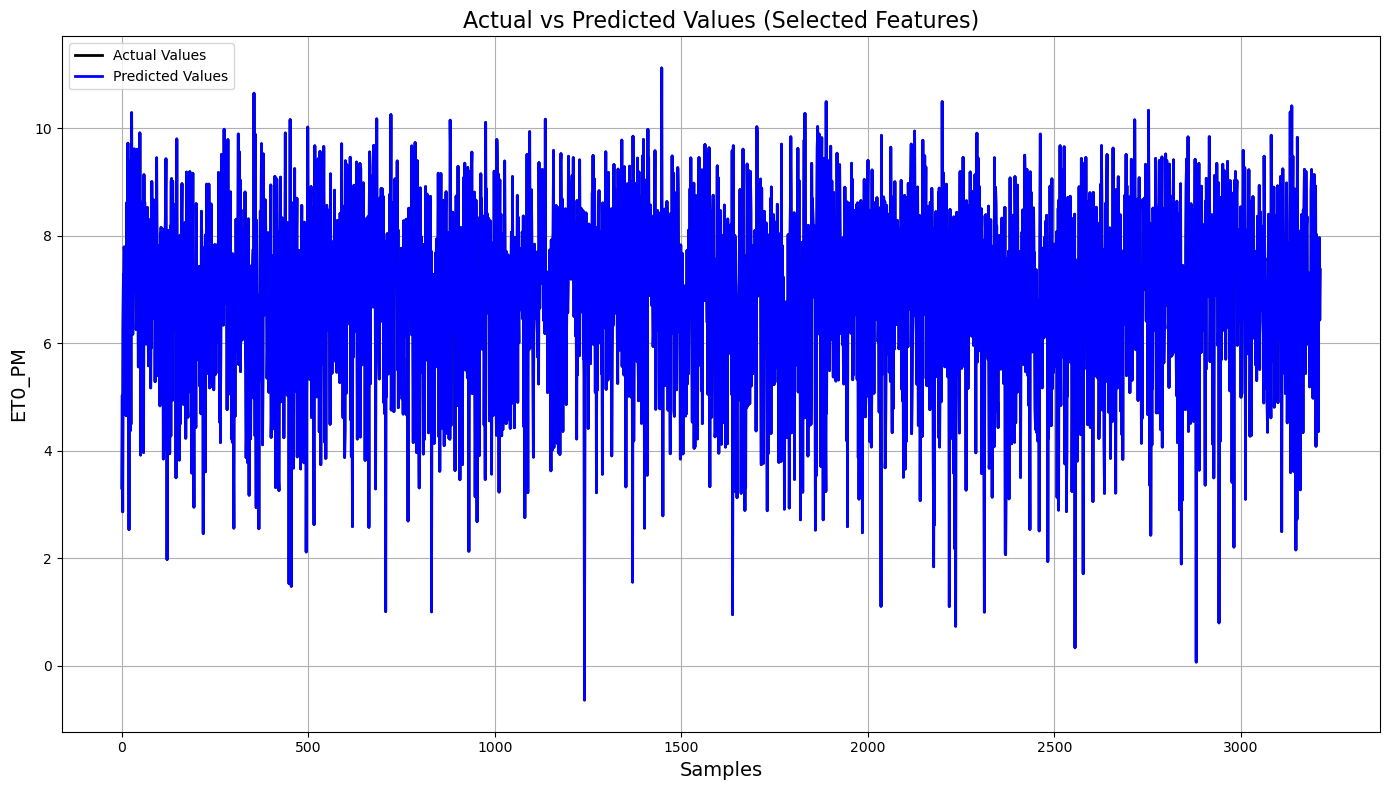

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pyswarms as ps

# Load and preprocess data
df = pd.read_csv(r"C:\Users\neevb\OneDrive\Desktop\new_data_final_year\analysis\Data_ETo_PM.csv")
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce', dayfirst=True)
df.set_index('DATE', inplace=True)

# Define features and target
target_column = 'ET0_PM'
feature_columns = ['T2M', 'TMIN', 'TMAX', 'TDEW', 'RH2M', 'RAIN', 'WIND', 'SRAD', 'TMEAN']

X = df[feature_columns].values
y = df[target_column].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

def objective_function(mask):
    """
    Objective function for feature selection using PSO.
    Args:
        mask (np.ndarray): Binary mask array indicating selected features for all particles.
    Returns:
        list: List of negative mean squared errors (MSE) for each particle.
    """
    # Initialize a list to store MSE for each particle
    scores = []
    
    # Iterate through each particle's mask
    for particle_mask in mask:
        # Ensure the mask is binary
        particle_mask = particle_mask.astype(bool)

        # If no features are selected, assign a high error
        if np.sum(particle_mask) == 0:
            scores.append(float('inf'))
            continue

        # Subset the data based on the particle's feature selection
        X_train_subset = X_train[:, particle_mask]
        X_test_subset = X_test[:, particle_mask]

        # Perform KFold Cross-Validation
        cv = KFold(n_splits=5, shuffle=True, random_state=42)
        mse_scores = []

        for train_idx, val_idx in cv.split(X_train_subset):
            X_fold_train, X_fold_val = X_train_subset[train_idx], X_train_subset[val_idx]
            y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]

            # Train the model
            model = LinearRegression()
            model.fit(X_fold_train, y_fold_train)

            # Predict and calculate MSE
            y_fold_pred = model.predict(X_fold_val)
            mse_scores.append(mean_squared_error(y_fold_val, y_fold_pred))

        # Append the average MSE (negative for minimization)
        scores.append(np.mean(mse_scores))

    return np.array(scores)  # Return a list of scores for all particles


# Set PSO parameters
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 3, 'p': 2}
dimensions = X_train.shape[1]  # Number of features

# Initialize PSO
optimizer = ps.discrete.BinaryPSO(n_particles=10, dimensions=dimensions, options=options)

# Perform optimization
best_cost, best_pos = optimizer.optimize(objective_function, iters=50)

# Extract the best feature subset
selected_features = [feature_columns[i] for i in range(dimensions) if best_pos[i] == 1]
print(f"Best Feature Subset: {selected_features}")
print(f"Best Cost (MSE): {best_cost}")

# Train a final model with the selected features
X_train_best = X_train[:, best_pos.astype(bool)]
X_test_best = X_test[:, best_pos.astype(bool)]

final_model = LinearRegression()
final_model.fit(X_train_best, y_train)
y_pred = final_model.predict(X_test_best)

# Evaluate the final model
final_mse = mean_squared_error(y_test, y_pred)
print(f"Final Model MSE: {final_mse:.4f}")

# Plot actual vs predicted values
plt.figure(figsize=(14, 8))
plt.plot(y_test, label="Actual Values", color="black", linewidth=2)
plt.plot(y_pred, label="Predicted Values", color="blue", linewidth=2)
plt.title("Actual vs Predicted Values (Selected Features)", fontsize=16)
plt.xlabel("Samples", fontsize=14)
plt.ylabel("ET0_PM", fontsize=14)
plt.legend(loc="upper left", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


Grey Wolf Optimization: 

In [10]:
import random
import math
import copy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv(r"C:\Users\neevb\OneDrive\Desktop\new_data_final_year\analysis\Data_ETo_PM.csv")
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce', dayfirst=True)
df.set_index('DATE', inplace=True)

# Define features and target
target_column = 'ET0_PM'
feature_columns = ['T2M', 'TMIN', 'TMAX', 'TDEW', 'RH2M', 'RAIN', 'WIND', 'SRAD', 'TMEAN']
X = df[feature_columns]
y = df[target_column]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# Fitness function for feature selection
def fitness_function(selected_weights, penalty_factor=0.01):
    # Decode weights into selected features (threshold > 0.5)
    selected_indices = [i for i in range(len(selected_weights)) if selected_weights[i] > 0.5]

    if len(selected_indices) == 0:  # Penalize if no features are selected
        return float('inf')

    # Select the corresponding features
    X_train_selected = X_train.iloc[:, selected_indices]
    X_test_selected = X_test.iloc[:, selected_indices]

    # Train a model and evaluate performance
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    mse = mean_squared_error(y_test, y_pred)

    # Add penalty for the number of features selected
    penalty = penalty_factor * len(selected_indices)
    return mse + penalty

# Define the wolf class
class Wolf:
    def __init__(self, dim, seed):
        self.rnd = random.Random(seed)
        self.position = [self.rnd.uniform(0, 1) for _ in range(dim)]  # Continuous positions [0, 1]
        self.fitness = None

# Grey Wolf Optimization (GWO) for feature selection
def gwo_feature_selection(fitness, max_iter, n, dim, penalty_factor=0.01):
    rnd = random.Random(0)
    population = [Wolf(dim, i) for i in range(n)]

    # Evaluate initial population
    for wolf in population:
        wolf.fitness = fitness(wolf.position, penalty_factor)

    # Sort population by fitness
    population = sorted(population, key=lambda x: x.fitness)
    alpha_wolf, beta_wolf, gamma_wolf = copy.deepcopy(population[:3])

    # Main loop
    for Iter in range(max_iter):
        a = 2 * (1 - Iter / max_iter)  # Linearly decreasing factor

        for wolf in population:
            A1, A2, A3 = [a * (2 * rnd.random() - 1) for _ in range(3)]
            C1, C2, C3 = [2 * rnd.random() for _ in range(3)]

            X1, X2, X3 = [0] * dim, [0] * dim, [0] * dim
            for j in range(dim):
                X1[j] = alpha_wolf.position[j] - A1 * abs(C1 * alpha_wolf.position[j] - wolf.position[j])
                X2[j] = beta_wolf.position[j] - A2 * abs(C2 * beta_wolf.position[j] - wolf.position[j])
                X3[j] = gamma_wolf.position[j] - A3 * abs(C3 * gamma_wolf.position[j] - wolf.position[j])
                wolf.position[j] = max(0, min(1, (X1[j] + X2[j] + X3[j]) / 3))  # Keep in [0, 1]

            wolf.fitness = fitness(wolf.position, penalty_factor)

        # Sort wolves and update alpha, beta, gamma
        population = sorted(population, key=lambda x: x.fitness)
        alpha_wolf, beta_wolf, gamma_wolf = copy.deepcopy(population[:3])

    return alpha_wolf.position

# Parameters for GWO
num_wolves = 30
max_iterations = 50
num_features = len(feature_columns)

# Run GWO
best_position = gwo_feature_selection(fitness_function, max_iterations, num_wolves, num_features)

# Decode selected features
selected_features = [feature_columns[i] for i in range(num_features) if best_position[i] > 0.5]
print("Selected Features:", selected_features)

Selected Features: ['WIND', 'SRAD']


In [12]:
feature_columns

['T2M', 'TMIN', 'TMAX', 'TDEW', 'RH2M', 'RAIN', 'WIND', 'SRAD', 'TMEAN']

In [11]:
best_position

[0.004498045791206728,
 0.29767338295761997,
 0.3272814832893319,
 0.3413954923472497,
 0.10326682962925411,
 0.3211696432539319,
 0.5829277947431644,
 0.571558226501726,
 0.08732550803292712]

Whale Optimization Algorithm 

In [14]:
import random
import math
import copy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv(r"C:\Users\neevb\OneDrive\Desktop\new_data_final_year\analysis\Data_ETo_PM.csv")
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce', dayfirst=True)
df.set_index('DATE', inplace=True)

# Define features and target
target_column = 'ET0_PM'
feature_columns = ['T2M', 'TMIN', 'TMAX', 'TDEW', 'RH2M', 'RAIN', 'WIND', 'SRAD', 'TMEAN']
X = df[feature_columns]
y = df[target_column]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# Fitness function for feature selection
def fitness_function(selected_features):
    # Select features with values > 0.5
    selected_indices = [i for i in range(len(selected_features)) if selected_features[i] > 0.5]

    if len(selected_indices) == 0:  # Penalize if no features are selected
        return float('inf')

    X_train_selected = X_train.iloc[:, selected_indices]
    X_test_selected = X_test.iloc[:, selected_indices]

    # Train the model and calculate MSE
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    mse = mean_squared_error(y_test, y_pred)
    
    return mse

# Whale class
class Whale:
    def __init__(self, dim, seed):
        self.rnd = random.Random(seed)
        self.position = [self.rnd.random() for _ in range(dim)]  # Continuous position between 0 and 1
        self.fitness = None

# Whale Optimization Algorithm (WOA) for feature selection
def woa_feature_selection(fitness, max_iter, n, dim):
    rnd = random.Random(0)
    population = [Whale(dim, i) for i in range(n)]

    # Evaluate the initial population
    for whale in population:
        whale.fitness = fitness(whale.position)

    # Identify the best solution (alpha whale)
    alpha_whale = copy.deepcopy(min(population, key=lambda x: x.fitness))

    # Main loop of WOA
    for Iter in range(max_iter):
        a = 2 * (1 - Iter / max_iter)  # Linearly decreasing factor
        a2 = -1 + Iter * ((-1) / max_iter)  # For spiral motion

        for whale in population:
            A = 2 * a * rnd.random() - a
            C = 2 * rnd.random()
            l = (a2 - 1) * rnd.random() + 1
            p = rnd.random()

            new_position = [0] * dim
            if p < 0.5:
                if abs(A) > 1:
                    # Exploitation: Position relative to the best whale
                    for j in range(dim):
                        D = abs(C * alpha_whale.position[j] - whale.position[j])
                        new_position[j] = alpha_whale.position[j] - A * D
                else:
                    # Exploration: Random whale's influence
                    random_whale = population[rnd.randint(0, n - 1)]
                    for j in range(dim):
                        D = abs(C * random_whale.position[j] - whale.position[j])
                        new_position[j] = random_whale.position[j] - A * D
            else:
                # Spiral updating mechanism
                for j in range(dim):
                    D = abs(alpha_whale.position[j] - whale.position[j])
                    new_position[j] = D * math.exp(2 * l) * math.cos(2 * math.pi * l) + alpha_whale.position[j]

            # Ensure the new positions are within the bounds [0, 1]
            whale.position = [max(0.0, min(1.0, pos)) for pos in new_position]

        # Evaluate all whales
        for whale in population:
            whale.fitness = fitness(whale.position)

        # Update the alpha whale
        alpha_whale = copy.deepcopy(min(population, key=lambda x: x.fitness))

    return alpha_whale.position

# Parameters for WOA
num_whales = 30
max_iterations = 50
num_features = len(feature_columns)

# Run WOA
best_position = woa_feature_selection(fitness_function, max_iterations, num_whales, num_features)

# Decode selected features
selected_features = [feature_columns[i] for i in range(num_features) if best_position[i] > 0.5]
print("Selected Features:", selected_features)


Selected Features: ['T2M', 'TMIN', 'TMAX', 'TDEW', 'RH2M', 'RAIN', 'WIND', 'SRAD', 'TMEAN']


In [15]:
best_position

[0.7552297458862505,
 0.7552297458862505,
 0.7552297458862505,
 0.7552297458862505,
 0.7552297458862505,
 0.7552297458862505,
 0.7552297458862505,
 0.7552297458862505,
 0.7552297458862505]

2025-01-23 12:18:03,599 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.4, 'c2': 0.2, 'w': 0.8}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=4.32e-6
2025-01-23 12:18:28,684 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.316429288791311e-06, best pos: [0.5865113  1.1408995  0.48163877 0.73924306 1.35139187 1.94339924
 0.99511767 1.69670629 0.79015555]


Selected Features: ['TMIN', 'RH2M', 'RAIN', 'WIND', 'SRAD']
Best Cost (MSE): 4.316429288791311e-06
Final Model MSE: 0.0000


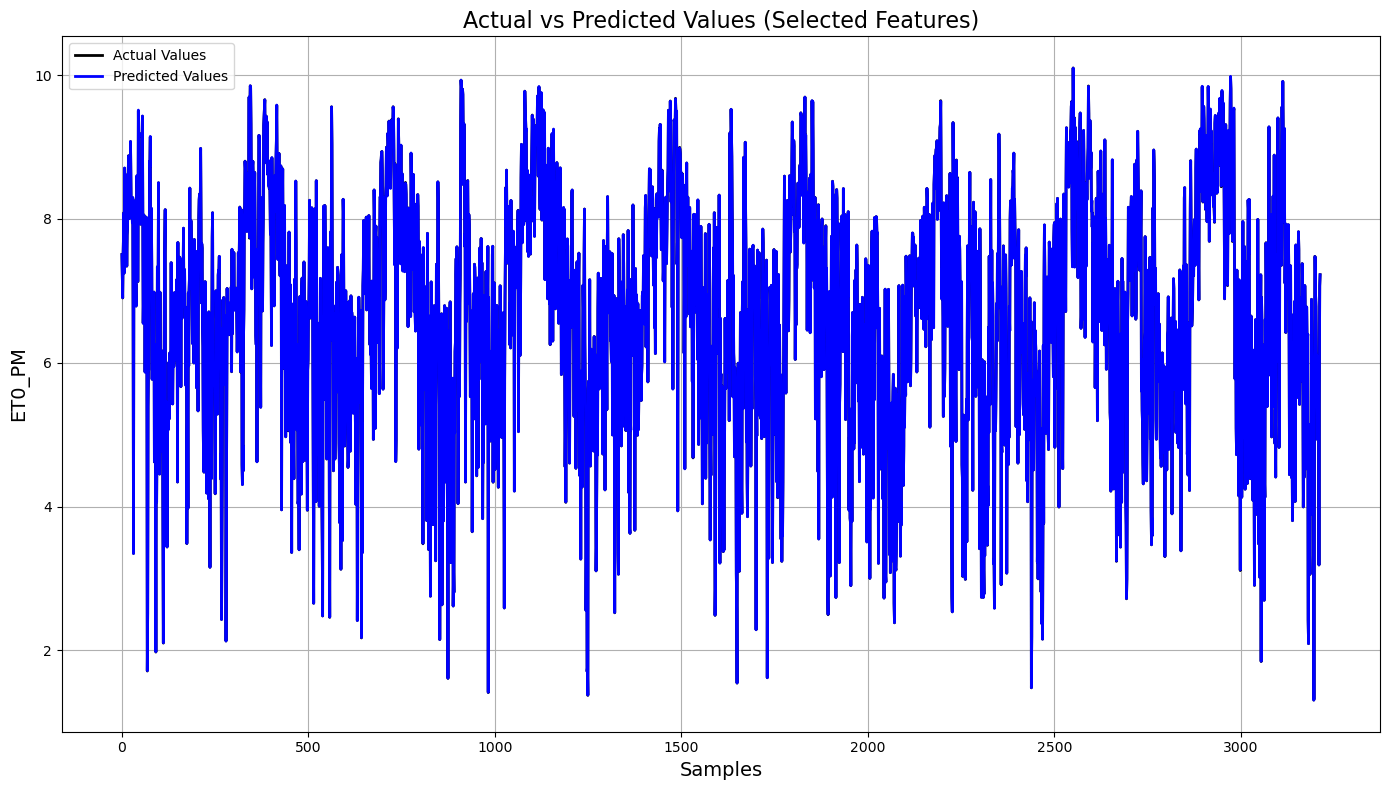

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pyswarms as ps

# Load and preprocess data
df = pd.read_csv(r"C:\Users\neevb\OneDrive\Desktop\new_data_final_year\analysis\Data_ETo_PM.csv")
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce', dayfirst=True)
df.set_index('DATE', inplace=True)

# Define features and target
target_column = 'ET0_PM'
feature_columns = ['T2M', 'TMIN', 'TMAX', 'TDEW', 'RH2M', 'RAIN', 'WIND', 'SRAD', 'TMEAN']

X = df[feature_columns].values
y = df[target_column].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

def objective_function(positions):
    """
    Objective function for feature selection using continuous PSO.
    Args:
        positions (np.ndarray): Array of continuous values indicating feature probabilities for all particles.
    Returns:
        np.ndarray: Array of mean squared errors (MSE) for each particle.
    """
    # Initialize a list to store MSE for each particle
    scores = []

    # Iterate through each particle's position
    for position in positions:
        # Interpret positions as feature probabilities and select features above threshold
        threshold = 0.5
        selected_features_mask = position > threshold

        # If no features are selected, assign a high error
        if np.sum(selected_features_mask) == 0:
            scores.append(float('inf'))
            continue

        # Subset the data based on the particle's feature selection
        X_train_subset = X_train[:, selected_features_mask]
        X_test_subset = X_test[:, selected_features_mask]

        # Perform KFold Cross-Validation
        cv = KFold(n_splits=6, shuffle=False)
        mse_scores = []

        for train_idx, val_idx in cv.split(X_train_subset):
            X_fold_train, X_fold_val = X_train_subset[train_idx], X_train_subset[val_idx]
            y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]

            # Train the model
            model = LinearRegression()
            model.fit(X_fold_train, y_fold_train)

            # Predict and calculate MSE
            y_fold_pred = model.predict(X_fold_val)
            mse_scores.append(mean_squared_error(y_fold_val, y_fold_pred))

        # Append the average MSE
        scores.append(np.mean(mse_scores))

    return np.array(scores)

# Set PSO parameters
options = {'c1': 0.4, 'c2': 0.2, 'w': 0.8}
dimensions = X_train.shape[1]  # Number of features

# Initialize PSO
optimizer = ps.single.GlobalBestPSO(n_particles=20, dimensions=dimensions, options=options)

# Perform optimization
best_cost, best_pos = optimizer.optimize(objective_function, iters=100)

# Interpret the best position as selected features
threshold = 0.8
selected_features_mask = best_pos > threshold
selected_features = [feature_columns[i] for i in range(dimensions) if selected_features_mask[i]]
print(f"Selected Features: {selected_features}")
print(f"Best Cost (MSE): {best_cost}")

# Train a final model with the selected features
X_train_best = X_train[:, selected_features_mask]
X_test_best = X_test[:, selected_features_mask]

final_model = LinearRegression()
final_model.fit(X_train_best, y_train)
y_pred = final_model.predict(X_test_best)

# Evaluate the final model
final_mse = mean_squared_error(y_test, y_pred)
print(f"Final Model MSE: {final_mse:.4f}")

# Plot actual vs predicted values
plt.figure(figsize=(14, 8))
plt.plot(y_test, label="Actual Values", color="black", linewidth=2)
plt.plot(y_pred, label="Predicted Values", color="blue", linewidth=2)
plt.title("Actual vs Predicted Values (Selected Features)", fontsize=16)
plt.xlabel("Samples", fontsize=14)
plt.ylabel("ET0_PM", fontsize=14)
plt.legend(loc="upper left", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


black widow optimization

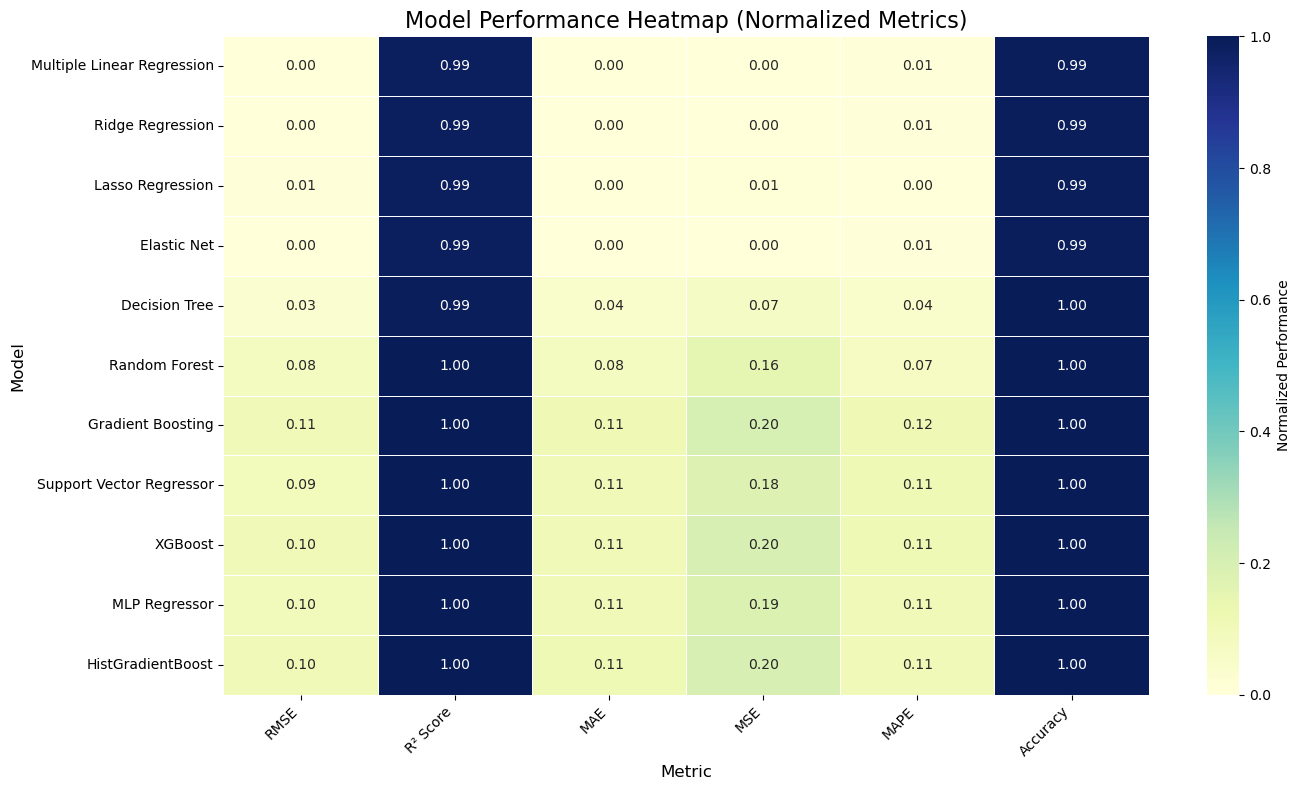

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create DataFrame
data = {
    'Model': ['Multiple Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Elastic Net', 'Decision Tree', 
              'Random Forest', 'Gradient Boosting', 'Support Vector Regressor', 'XGBoost', 'MLP Regressor', 'HistGradientBoost'],
    'RMSE': [0.380988, 0.380974, 0.378913, 0.380956, 0.367994, 0.350065, 0.340343, 0.345645, 0.341379, 0.343848, 0.341432],
    'R² Score': [0.937132, 0.937136, 0.937815, 0.937142, 0.941347, 0.946923, 0.949830, 0.948255, 0.949524, 0.948791, 0.949509],
    'MAE': [0.300753, 0.300748, 0.299841, 0.300738, 0.288651, 0.277761, 0.266425, 0.268641, 0.268055, 0.268535, 0.267291],
    'MSE': [0.145152, 0.145141, 0.143575, 0.145128, 0.135419, 0.122546, 0.115833, 0.119471, 0.116540, 0.118232, 0.116576],
    'MAPE': [5.160260, 5.160474, 5.187618, 5.160394, 4.979716, 4.809090, 4.581514, 4.610114, 4.620041, 4.629660, 4.632579],
    'Accuracy': [0.983908, 0.983902, 0.984627, 0.983901, 0.989917, 0.988674, 0.988980, 0.988247, 0.988648, 0.987835, 0.988959]
}
df = pd.DataFrame(data)

# Normalize metrics (for better heatmap visualization)
normalized_df = df.copy()
for metric in ['RMSE', 'MAE', 'MSE', 'MAPE']:
    normalized_df[metric] = 1 - (normalized_df[metric] / normalized_df[metric].max())  # Lower values = better
for metric in ['R² Score', 'Accuracy']:
    normalized_df[metric] = normalized_df[metric] / normalized_df[metric].max()  # Higher values = better

# Set index to Model and drop Accuracy if not needed
normalized_df = normalized_df.set_index('Model')

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    normalized_df,
    annot=True,
    cmap='YlGnBu',
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Normalized Performance'}
)
plt.title('Model Performance Heatmap (Normalized Metrics)', fontsize=16)
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

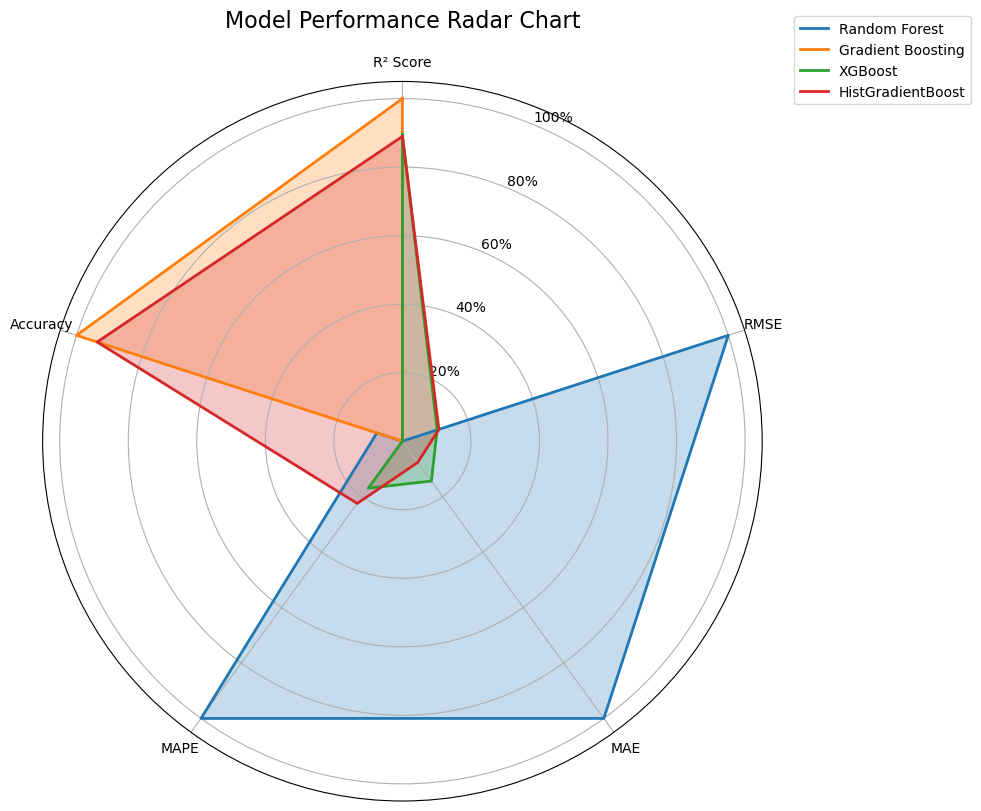

In [2]:
import numpy as np

# Select a subset of models (radar charts get cluttered with too many models)
models_to_plot = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'HistGradientBoost']
filtered_df = df[df['Model'].isin(models_to_plot)]

# Metrics to include (excluding MSE for simplicity)
metrics = ['R² Score', 'RMSE', 'MAE', 'MAPE', 'Accuracy']

# Normalize data for radar chart
def normalize(data):
    return (data - data.min()) / (data.max() - data.min())

radar_data = filtered_df[metrics].apply(normalize, axis=0)
radar_data = radar_data.values

# Create angles for radar chart
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # Close the loop

# Plot radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'polar': True})
for i, model in enumerate(filtered_df['Model']):
    values = radar_data[i].tolist()
    values += values[:1]  # Close the loop
    ax.plot(angles, values, linewidth=2, label=model)
    ax.fill(angles, values, alpha=0.25)

# Customize
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], metrics)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], labels=["20%", "40%", "60%", "80%", "100%"])
plt.title('Model Performance Radar Chart', fontsize=16, pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

c:\Users\neevb\anaconda3\envs\evotra\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\neevb\anaconda3\envs\evotra\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\neevb\anaconda3\envs\evotra\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\neevb\anaconda3\envs\evotra\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `pal

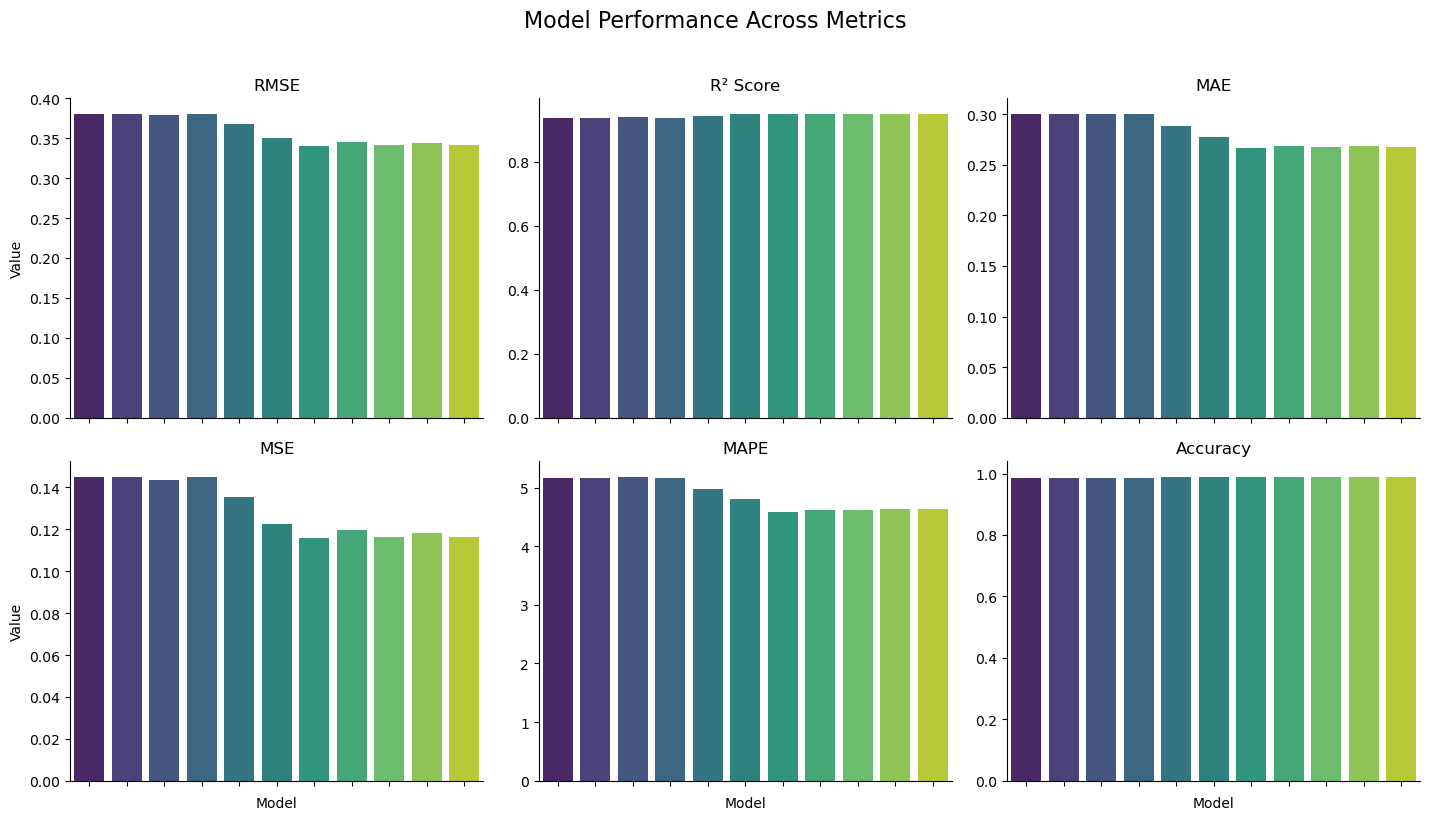

In [3]:
# Reshape data for faceting
df_melted = df.melt(id_vars=['Model'], var_name='Metric', value_name='Value')

# Create a grid of bar plots
g = sns.FacetGrid(
    df_melted,
    col='Metric',
    col_wrap=3,
    sharey=False,
    height=4,
    aspect=1.2
)
g.map(sns.barplot, 'Model', 'Value', order=df['Model'], palette='viridis')
g.set_xticklabels(rotation=90, ha='center', fontsize=8)
g.set_titles(col_template='{col_name}', size=12)
g.fig.suptitle('Model Performance Across Metrics', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

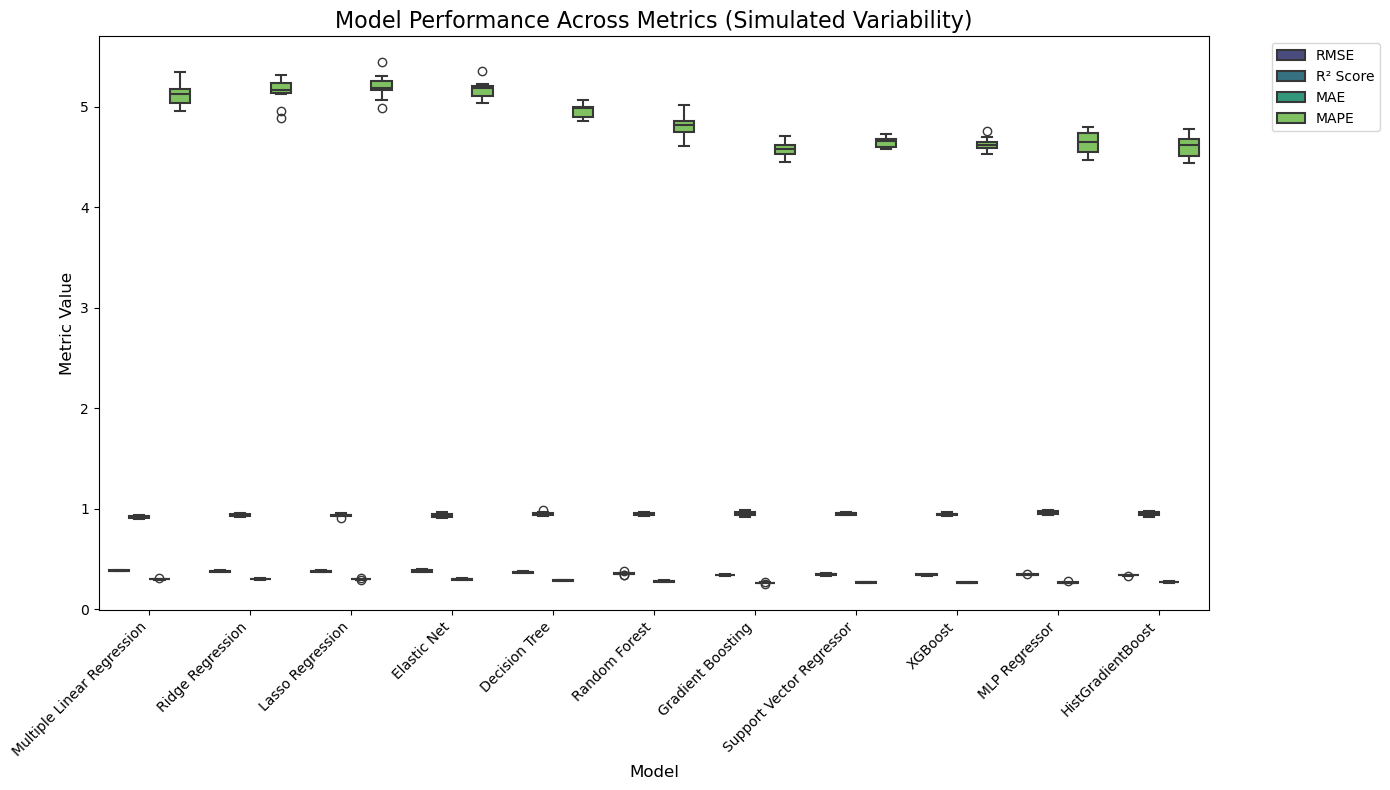

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create synthetic data (assuming 10 runs per model for illustration)
np.random.seed(42)
models = df['Model'].tolist()
metrics = ['RMSE', 'R² Score', 'MAE', 'MAPE']

# Generate synthetic data for multiple runs
data = []
for model in models:
    for metric in metrics:
        # Simulate variability around the original metric value
        base_value = df[df['Model'] == model][metric].values[0]
        noise = np.random.normal(0, 0.02 * base_value, 10)  # 10 runs with 2% noise
        for value in base_value + noise:
            data.append({'Model': model, 'Metric': metric, 'Value': value})

simulated_df = pd.DataFrame(data)

# Plot grouped box plots
plt.figure(figsize=(14, 8))
sns.boxplot(
    x='Model', 
    y='Value', 
    hue='Metric', 
    data=simulated_df, 
    palette='viridis',
    linewidth=1.5
)
plt.title('Model Performance Across Metrics (Simulated Variability)', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Metric Value', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

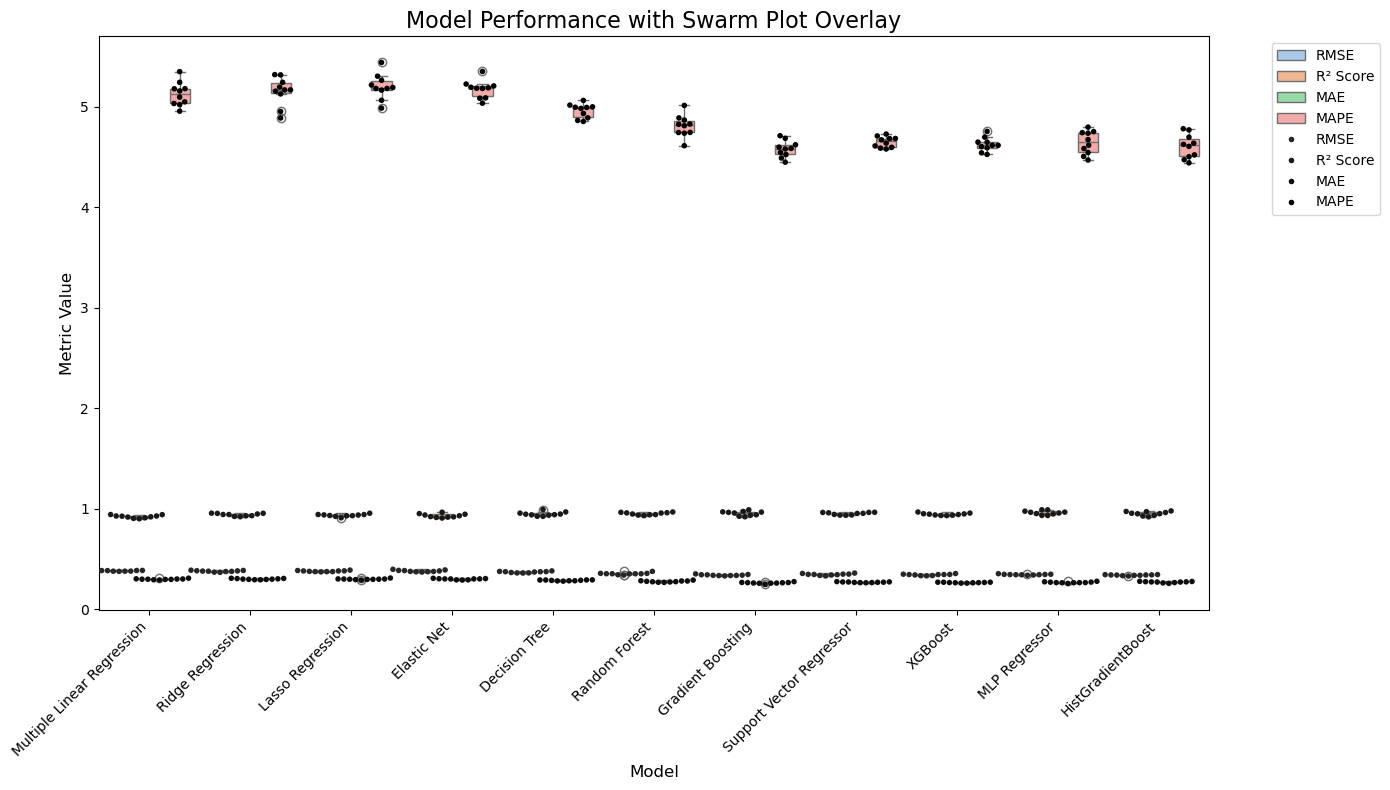

In [5]:
plt.figure(figsize=(14, 8))
sns.boxplot(
    x='Model', 
    y='Value', 
    hue='Metric', 
    data=simulated_df, 
    palette='pastel',
    linewidth=1,
    width=0.8
)
sns.swarmplot(
    x='Model', 
    y='Value', 
    hue='Metric', 
    data=simulated_df, 
    palette='dark:k',
    dodge=True,
    size=4
)
plt.title('Model Performance with Swarm Plot Overlay', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Metric Value', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

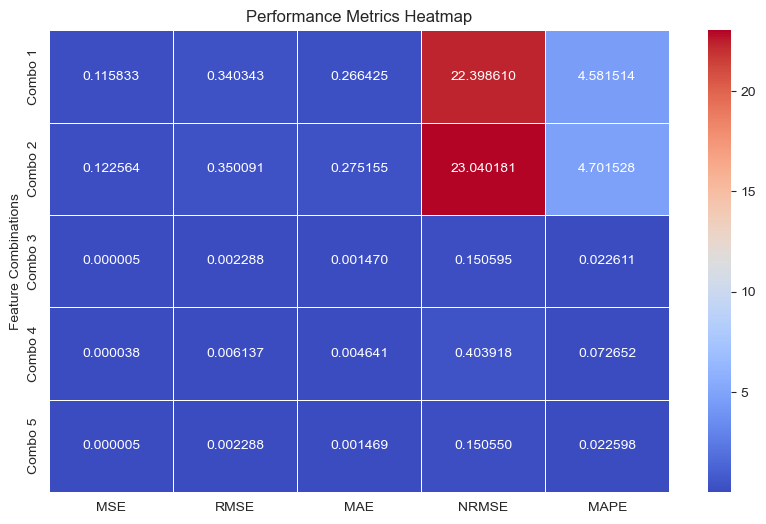

C:\Users\neevb\AppData\Local\Temp\ipykernel_3312\429036009.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Combination', y='R² Score', data=df, palette='viridis', label='R² Score', ax=ax1)


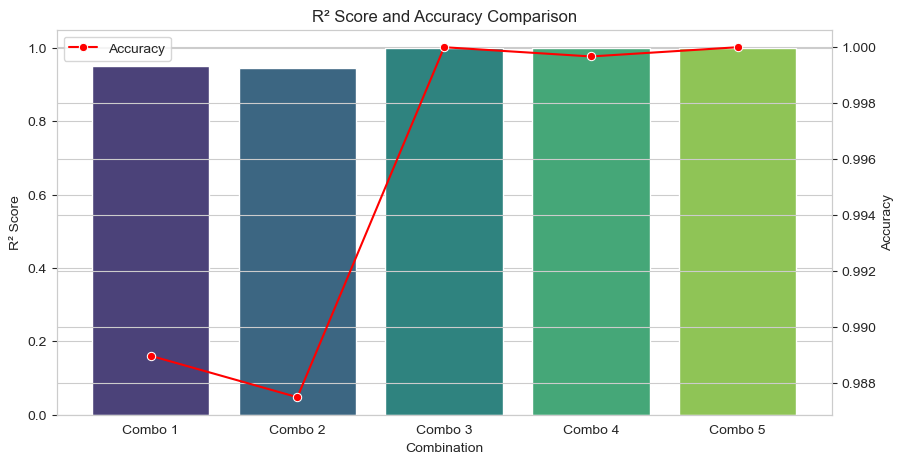

Best Performing Model: Multiple Linear Regression
Best Feature Combination: Combo 3


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for visualization
data = {
    'Combination': ['Combo 1', 'Combo 2', 'Combo 3', 'Combo 4', 'Combo 5'],
    'Model': ['Gradient Boosting', 'Support Vector Regressor', 'Multiple Linear Regression', 'Multiple Linear Regression', 'Multiple Linear Regression'],
    'MSE': [0.115833, 0.122564, 0.000005, 0.000038, 0.000005],
    'RMSE': [0.340343, 0.350091, 0.002288, 0.006137, 0.002288],
    'MAE': [0.266425, 0.275155, 0.001470, 0.004641, 0.001469],
    'R² Score': [0.949830, 0.946915, 0.999998, 0.999984, 0.999998],
    'NRMSE': [22.398610, 23.040181, 0.150595, 0.403918, 0.150550],
    'MAPE': [4.581514, 4.701528, 0.022611, 0.072652, 0.022598],
    'Accuracy': [0.988980, 0.987499, 0.999999, 0.999669, 0.999999]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Set style
sns.set_style("whitegrid")

# Heatmap to visualize performance metrics
plt.figure(figsize=(10, 6))
sns.heatmap(df.set_index('Combination')[['MSE', 'RMSE', 'MAE', 'NRMSE', 'MAPE']], annot=True, fmt='.6f', cmap='coolwarm', linewidths=0.5)
plt.title("Performance Metrics Heatmap")
plt.ylabel("Feature Combinations")
plt.show()

# Bar plot for R² Score and Accuracy
fig, ax1 = plt.subplots(figsize=(10, 5))
sns.barplot(x='Combination', y='R² Score', data=df, palette='viridis', label='R² Score', ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(x='Combination', y='Accuracy', data=df, color='red', marker='o', label='Accuracy', ax=ax2)
ax1.set_ylabel("R² Score")
ax2.set_ylabel("Accuracy")
plt.title("R² Score and Accuracy Comparison")
plt.show()

# Print Best Model and Features
best_model = df.loc[df['R² Score'].idxmax()]
print(f"Best Performing Model: {best_model['Model']}")
print(f"Best Feature Combination: {best_model['Combination']}")
